In [2]:
import os
import sys
sys.path.insert(0,os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir, os.pardir, os.pardir, os.pardir, os.pardir, os.pardir)))
sys.path.insert(0,os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir, os.pardir, os.pardir, os.pardir, os.pardir)))

## Model fit (average over 10 runs)

In [28]:
#load results
import pandas as pd
import numpy as np
import os
results_directory = os.getcwd() + r"\homeoffice\models\estimation\2021"
n_runs = 10
model = ["dcm", "rumboost"]
intensity = [20, 10, 0]

indices = [
    ('dcm', 'teleworking intensity (days)', 'train'),
    ('dcm', 'teleworking intensity (days)', 'test'),
    ('dcm', 'teleworking intensity (half days)', 'train'),
    ('dcm', 'teleworking intensity (half days)', 'test'),
    ('dcm', 'teleworking possibility', 'train'),
    ('dcm', 'teleworking possibility', 'test'),
    ('rumboost', 'teleworking intensity (days)', 'train'),
    ('rumboost', 'teleworking intensity (days)', 'test'),
    ('rumboost', 'teleworking intensity (half days)', 'train'),
    ('rumboost', 'teleworking intensity (half days)', 'test'),
    ('rumboost', 'teleworking possibility', 'train'),
    ('rumboost', 'teleworking possibility', 'test')
]
df = pd.DataFrame({}, columns=["CEL", "MAE", "MSE", "EMAE", "EMSE"], index=pd.MultiIndex.from_tuples(indices, names=["model", "type", "task"]))
std_df = pd.DataFrame({}, columns=["CEL", "MAE", "MSE", "EMAE", "EMSE"], index=pd.MultiIndex.from_tuples(indices, names=["model", "type", "task"]))
for m in model:
  for i in intensity:
    data = []
    for j in range(n_runs):
        if i > 0 and m == "dcm":
            results_file = f"{results_directory}/metrics_wfh_intensity{i}_seed{j}_.csv"
            index = ["train", "test"]
            cols = ["CEL", "MAE", "MSE", "EMAE", "EMSE"]
        elif i > 0 and m == "rumboost":
            results_file = f"{results_directory}/rumboost_metrics_wfh_intensity{i}_seed{j}_.csv"
            index = ["train_final", "test"]
            cols = ["CEL", "MAE", "MSE", "EMAE", "EMSE"]
        elif i == 0 and m == "dcm":
            results_file = f"{results_directory}/metrics_wfh_possibility_seed{j}_.csv"
            index = ["train", "test"]
            cols = ["CEL"]
        elif i == 0 and m == "rumboost":
            results_file = f"{results_directory}/rumboost_metrics_wfh_possibility_seed{j}_.csv"
            index = ["train_final", "test"]
            cols = ["CEL"]
        with open(results_file, "r") as f:
            data.append(pd.read_csv(f, index_col=0).loc[index, :].values)

    if i == 20:
        iterables = [[m], [f"teleworking intensity (days)"], ["train", "test"]]
    elif i == 10:
        iterables = [[m], [f"teleworking intensity (half days)"], ["train", "test"]]
    elif i == 0:
        iterables = [[m], [f"teleworking possibility"], ["train", "test"]]
    
    mulitindex = pd.MultiIndex.from_product(iterables, names=["model", "type", "task"])

    # df.join(pd.DataFrame(np.array(data).mean(axis=0), index=mulitindex, columns=cols), on=cols)
    df.loc[mulitindex, cols] = np.array(data).mean(axis=0)
    std_df.loc[mulitindex, cols] = np.array(data).std(axis=0)

In [29]:
formatted_df = df.pivot_table(index=["type", "model"], columns="task").map(lambda x: f"{x:.3f}" if not pd.isna(x) else "NaN") + " (± " + std_df.pivot_table(index=["type", "model"], columns="task").map(lambda x: f"{x:.3f}" if not pd.isna(x) else "NaN") + ")"

formatted_df.replace("NaN (± NaN)", "-")


CEL                   \
task                                                   test            train   
type                              model                                        
teleworking intensity (days)      dcm       1.673 (± 0.012)  1.665 (± 0.003)   
                                  rumboost  1.661 (± 0.012)  1.647 (± 0.003)   
teleworking intensity (half days) dcm       2.174 (± 0.009)  2.166 (± 0.002)   
                                  rumboost  2.162 (± 0.009)  2.149 (± 0.003)   
teleworking possibility           dcm       0.560 (± 0.004)  0.559 (± 0.001)   
                                  rumboost  0.556 (± 0.004)  0.552 (± 0.001)   

                                                       EMAE                   \
task                                                   test            train   
type                              model                                        
teleworking intensity (days)      dcm       1.921 (± 0.006)  1.913 (± 0.003)   
                                  rumboost  1.893 (± 0.005)  1.879 (± 0.004)   
teleworking intensity (half days) dcm       3.959 (± 0.010)  3.943 (± 0.005)   
                                  rumboost  3.903 (± 0.008)  3.873 (± 0.008)   
teleworking possibility           dcm                     -                -   
                                  rumboost                -                -   

                                                        EMSE  \
task                                                    test   
type                              model                        
teleworking intensity (days)      dcm        5.992 (± 0.022)   
                                  rumboost   5.862 (± 0.021)   
teleworking intensity (half days) dcm       25.302 (± 0.074)   
                                  rumboost  24.754 (± 0.064)   
teleworking possibility           dcm                      -   
                                  rumboost                 -   

                                                                          MAE  \
task                                                   train             test   
type                              model                                         
teleworking intensity (days)      dcm        5.957 (± 0.013)  1.504 (± 0.009)   
                                  rumboost   5.798 (± 0.015)  1.482 (± 0.008)   
teleworking intensity (half days) dcm       25.161 (± 0.042)  3.106 (± 0.013)   
                                  rumboost  24.483 (± 0.063)  3.079 (± 0.012)   
teleworking possibility           dcm                      -                -   
                                  rumboost                 -                -   

                                                                          MSE  \
task                                                  train              test   
type                              model                                         
teleworking intensity (days)      dcm       1.490 (± 0.002)   3.017 (± 0.028)   
                                  rumboost  1.458 (± 0.003)   2.939 (± 0.027)   
teleworking intensity (half days) dcm       3.079 (± 0.003)  12.850 (± 0.064)   
                                  rumboost  3.043 (± 0.005)  12.632 (± 0.063)   
teleworking possibility           dcm                     -                 -   
                                  rumboost                -                 -   

                                                              
task                                                   train  
type                              model                       
teleworking intensity (days)      dcm        2.981 (± 0.007)  
                                  rumboost   2.873 (± 0.007)  
teleworking intensity (half days) dcm       12.737 (± 0.018)  
                                  rumboost  12.454 (± 0.026)  
teleworking possibility           dcm                      -  
                                  rumboost                 -

Note for the paper: 
- This is the mean and standard deviation of 10 runs with different train test splits
- The models are compared with 3 probabilitic metrics (Cross-Entropy Loss, Expected Mean Absolute Error, Expected Mean Squared Error) and two regression metrics (Mean Absolute Error, Mean Squared Error)
- There are two models: RUMBoost and an Ordinal Logit, applied to three choices situations: 
    1. Intensity of teleworking, defined at the days (e.g. 45% of teleworking is counted as 3 days of teleworking),
    2. Intensity of teleworking, defined as half days (e.g. 45% of teleworking is counted as 2.5 days of teleworking),
    3. Possibility of teleworking, this is a binary classification problem
- For MAE and MSE, the ascs need to be recomputed since the models have been trained with maximum likelihood / cross-entropy loss, and ascs are implicitly contained within the thresholds. For MSE, asc is the mean of residuals, and for MAE it is the median of residuals (formulas to add in the methodology of the paper). They are reestimated only with the training set.


## Parameters

In [ ]:
#load results
import pandas as pd
import numpy as np
import glob
from src.simba.mobi.rumboost.rumboost import RUMBoost
from src.simba.mobi.rumboost.utility_plotting import weights_to_plot_v2, non_lin_function

results_directory = os.getcwd() + r"\homeoffice\models\estimation\2021"
n_runs = 10

model = ["dcm", "rumboost"]
# model = ["dcm"]
intensity = [20, 10, 0]

indices = [
    ('dcm', 'teleworking intensity (days)'),
    ('dcm', 'teleworking intensity (half days)'),
    ('dcm', 'teleworking possibility'),
    ('rumboost', 'teleworking intensity (days)'),
    ('rumboost', 'teleworking intensity (half days)'),
    ('rumboost', 'teleworking possibility')
]

index = ['alternative_specific_constant', 'b_executives_21', 'b_falc_id_NA',
       'b_general_abo_halbtax', 'b_german_speaking',
       'b_hh_income_8000_or_less', 'b_hh_income_na',
       'b_hh_income_2000_to_4000', 'b_hh_income_4001_to_6000', 'b_hh_income_6001_to_8000',
       'b_home_work_distance_car_NA', 'b_is_falc_id_6to9_1_21',
       'b_is_production_1_21', 
       'b_is_wohlesale_1_21', 'b_no_post_school_education',
       'b_number_of_children', 'b_number_of_children_NA',
       'b_secondary_education', 'b_single_houshold', 'b_tertiary_education',
       'beta_accsib_home_not_NA_5_10_21', 'beta_age_21_18_35',
       'beta_home_work_distance_car_0_0.15', 
       'beta_work_percentage_95_101_20_21', 'tau_1', 'tau_1_diff_1',
       'tau_1_diff_2', 'tau_1_diff_3', 'tau_1_diff_4', 'tau_1_diff_5',
       'tau_1_diff_6', 'tau_1_diff_7', 'tau_1_diff_8', 'tau_1_diff_9']

rename_params = {
    "home_work_distance_car": "beta_home_work_distance_car_0_0.15",
    "accsib_home_not_NA_21": "beta_accsib_home_not_NA_5_10_21",
    "secondary_education": "b_secondary_education",
    "work_percentage_21": "beta_work_percentage_95_101_20_21",
    "business_sector_wholesale_21": "b_is_wohlesale_1_21",
    "number_of_children_not_NA": "b_number_of_children",
    "business_sector_production_21": "b_is_production_1_21",
    "tertiary_education": "b_tertiary_education",
    "fal_id_NA": "b_falc_id_NA",
    "hh_income_6001_to_8000": "b_hh_income_6001_to_8000",
    "age_21": "beta_age_21_18_35",
    "executives_21": "b_executives_21",
    "german_speaking": "b_german_speaking",
    "no_post_school_educ": "b_no_post_school_education",
    "hh_income_2000_to_4000": "b_hh_income_2000_to_4000",
    "hh_income_4001_to_6000": "b_hh_income_4001_to_6000",
    "hh_income_na": "b_hh_income_na",
    "single_household": "b_single_houshold",
    "is_falc_id_6to9_21": "b_is_falc_id_6to9_1_21",
}

nonlin_params = ["beta_age_21_18_35", "beta_accsib_home_not_NA_5_10_21", "beta_home_work_distance_car_0_0.15", "b_number_of_children", "beta_work_percentage_95_101_20_21"] #nonlinear parameters in the RUMBoost model
nonlin_params_name = ["age_21", "accsib_home_not_NA_21", "home_work_distance_car", "number_of_children_not_NA", "work_percentage_21"]
thresholds_names = ["tau_1", "tau_1_diff_1", "tau_1_diff_2", "tau_1_diff_3", "tau_1_diff_4", "tau_1_diff_5", "tau_1_diff_6", "tau_1_diff_7", "tau_1_diff_8", "tau_1_diff_9"]

df = pd.DataFrame({}, columns=pd.MultiIndex.from_tuples(indices, names=["model", "type"]), index=index)
std_df = pd.DataFrame({}, columns=pd.MultiIndex.from_tuples(indices, names=["model", "type"]), index=index)
sign_df = pd.DataFrame({}, columns=pd.MultiIndex.from_tuples(indices, names=["model", "type"]), index=index)
all_weights = {}

for m in model:
  for i in intensity:
    if i == 20:
        cols = pd.MultiIndex.from_product([[m], ["teleworking intensity (days)"]])
    elif i == 10:
        cols = pd.MultiIndex.from_product([[m], ["teleworking intensity (half days)"]])
    elif i == 0:
        cols = pd.MultiIndex.from_product([[m], ["teleworking possibility"]])
    data = []
    significance = []
    all_weights[i] = []
    for j in range(n_runs):


        if m == "dcm":
            if i > 0:
                results_file = glob.glob(f"{results_directory}/parameters_dcm_wfh_intensity{i}_seed{j}_*.csv")[0]
            else:
                results_file = glob.glob(f"{results_directory}/parameters_dcm_wfh_possibility_seed{j}_*.csv")[0]
            with open(results_file, "r") as f:
                df_dcm = pd.read_csv(f, index_col=0)
                index = df_dcm.index
                data.append(df_dcm["Value"].values)
                significance.append(df_dcm["Rob. p-value"].values)

        elif m == "rumboost":
            if i > 0:
                results_file = glob.glob(f"{results_directory}/rumboost_model_wfh_intensity{i}_seed{j}_*.json")[0]
            else:
                results_file = glob.glob(f"{results_directory}/rumboost_model_wfh_possibility_seed{j}_*.json")[0]
            rum_model = RUMBoost(model_file=results_file)
            weights = weights_to_plot_v2(rum_model)['0']

            binary_variables = [weights[f]["Histogram values"][1] if f in weights.keys() and len(weights[f]["Splitting points"])==1 else 0 for f in rename_params.keys()]
            index = list(rename_params.values())

            df_rum = pd.DataFrame(binary_variables, columns=cols, index=index)

            df_rum.loc[nonlin_params, :] = -99

            asc = np.sum([v["Histogram values"][0] for v in weights.values()])

            if i > 0:
                df_rum.loc["tau_1", :] = rum_model.thresholds[0] - asc
                for k, t in enumerate(np.diff(rum_model.thresholds)):
                    df_rum.loc[thresholds_names[k+1], :] = t
                index = index + thresholds_names[:len(rum_model.thresholds)]
            else:
                df_rum.loc["alternative_specific_constant", :] = asc
                index = index + ["alternative_specific_constant"]

            data.append(df_rum.values)

            all_weights[i].append(weights)

    df.loc[index, cols] = np.array(data).mean(axis=0)
    std_df.loc[index, cols] = np.array(data).std(axis=0)
    if m == "dcm":
        sign_df.loc[index, cols] = np.array(significance).mean(axis=0)

In [31]:
pd.set_option('future.no_silent_downcasting', True)

formatted_df = df.map(lambda x: f"{x:.3f}" if not pd.isna(x) else "NaN") + " (± " + std_df.map(lambda x: f"{x:.3f}" if not pd.isna(x) else "NaN") + ")" + sign_df.map(lambda x: "***" if x < 0.01 else "**" if x < 0.05 else "*" if x < 0.1 else "")

formatted_df.replace("NaN (± NaN)", "-").replace("-99.000 (± 0.000)", "Non-linear").replace("0.000 (± 0.000)", "-")


model                                                       dcm  \
type                               teleworking intensity (days)   
alternative_specific_constant                                 -   
b_executives_21                              -0.080 (± 0.009)**   
b_falc_id_NA                                 0.658 (± 0.048)***   
b_general_abo_halbtax                           0.024 (± 0.017)   
b_german_speaking                            0.182 (± 0.014)***   
b_hh_income_8000_or_less                    -0.135 (± 0.021)***   
b_hh_income_na                                 -0.011 (± 0.025)   
b_hh_income_2000_to_4000                                      -   
b_hh_income_4001_to_6000                                      -   
b_hh_income_6001_to_8000                                      -   
b_home_work_distance_car_NA                     0.149 (± 0.071)   
b_is_falc_id_6to9_1_21                       0.409 (± 0.037)***   
b_is_production_1_21                          0.285 (± 0.043)**   
b_is_wohlesale_1_21                          0.683 (± 0.056)***   
b_no_post_school_education                     -0.052 (± 0.053)   
b_number_of_children                        -0.109 (± 0.006)***   
b_number_of_children_NA                         0.140 (± 0.072)   
b_secondary_education                       -0.219 (± 0.016)***   
b_single_houshold                              -0.087 (± 0.026)   
b_tertiary_education                        -0.302 (± 0.018)***   
beta_accsib_home_not_NA_5_10_21              0.064 (± 0.005)***   
beta_age_21_18_35                            0.024 (± 0.002)***   
beta_home_work_distance_car_0_0.15           6.147 (± 0.302)***   
beta_work_percentage_95_101_20_21            0.046 (± 0.003)***   
tau_1                                       -1.070 (± 0.057)***   
tau_1_diff_1                                 1.776 (± 0.020)***   
tau_1_diff_2                                 0.535 (± 0.004)***   
tau_1_diff_3                                 0.581 (± 0.005)***   
tau_1_diff_4                                 0.424 (± 0.005)***   
tau_1_diff_5                                                  -   
tau_1_diff_6                                                  -   
tau_1_diff_7                                                  -   
tau_1_diff_8                                                  -   
tau_1_diff_9                                                  -   

model                                                                 \
type                               teleworking intensity (half days)   
alternative_specific_constant                                      -   
b_executives_21                                  -0.113 (± 0.012)***   
b_falc_id_NA                                      0.656 (± 0.052)***   
b_general_abo_halbtax                                0.026 (± 0.015)   
b_german_speaking                                 0.158 (± 0.013)***   
b_hh_income_8000_or_less                         -0.147 (± 0.022)***   
b_hh_income_na                                      -0.016 (± 0.027)   
b_hh_income_2000_to_4000                                           -   
b_hh_income_4001_to_6000                                           -   
b_hh_income_6001_to_8000                                           -   
b_home_work_distance_car_NA                          0.158 (± 0.071)   
b_is_falc_id_6to9_1_21                            0.413 (± 0.042)***   
b_is_production_1_21                               0.280 (± 0.046)**   
b_is_wohlesale_1_21                               0.672 (± 0.062)***   
b_no_post_school_education                          -0.118 (± 0.059)   
b_number_of_children                             -0.106 (± 0.006)***   
b_number_of_children_NA                              0.136 (± 0.039)   
b_secondary_education                            -0.213 (± 0.015)***   
b_single_houshold                                   -0.071 (± 0.025)   
b_tertiary_education                             -0.289 (± 0.017)***   
bet

Note for the paper:

- All values are averaged over the 10 runs, with the corresponding standard deviation (note that this is not the standard deviation of the actual parameter estimated by biogeme, these are available in raw results)
- 3 stars indicate a significant parameter at the 99% level, 2 stars at the 95% level, and 1 star at 90% level. No star means that the parameter has not been significant on average.
- The thresholds are, apart from the first one, the difference in between the subsequent ones.

## Non-linear parameters from RUMBoost

c:\Users\ucesnjs\anaconda32\envs\old_rumboost\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ucesnjs\anaconda32\envs\old_rumboost\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ucesnjs\anaconda32\envs\old_rumboost\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ucesnjs\anaconda32\envs\old_rumboost\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

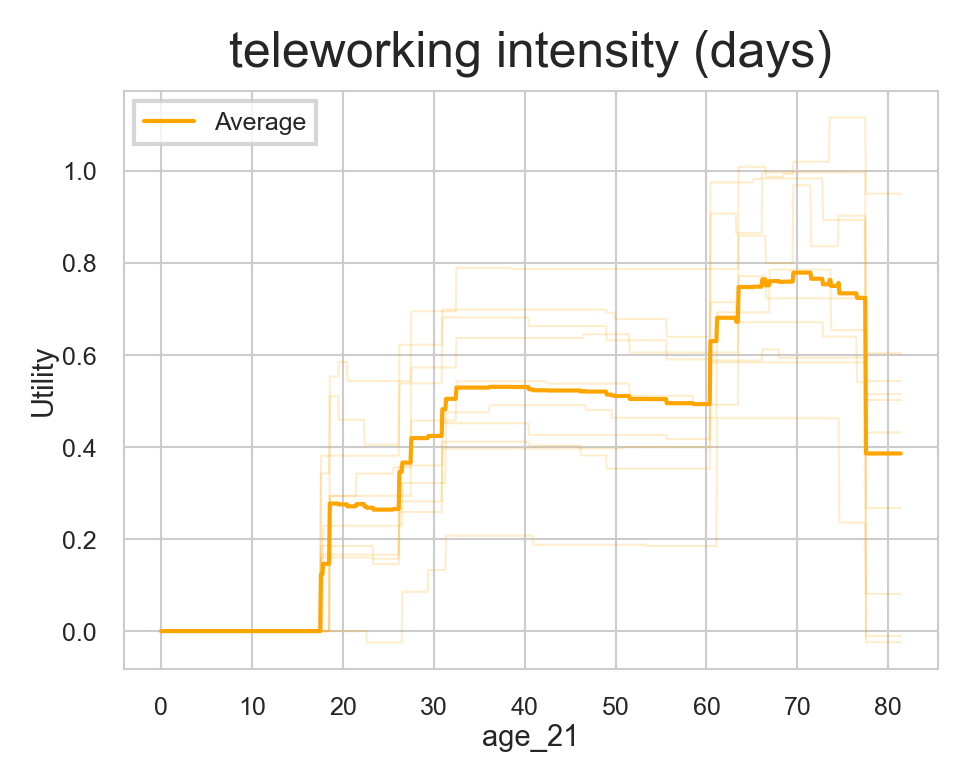

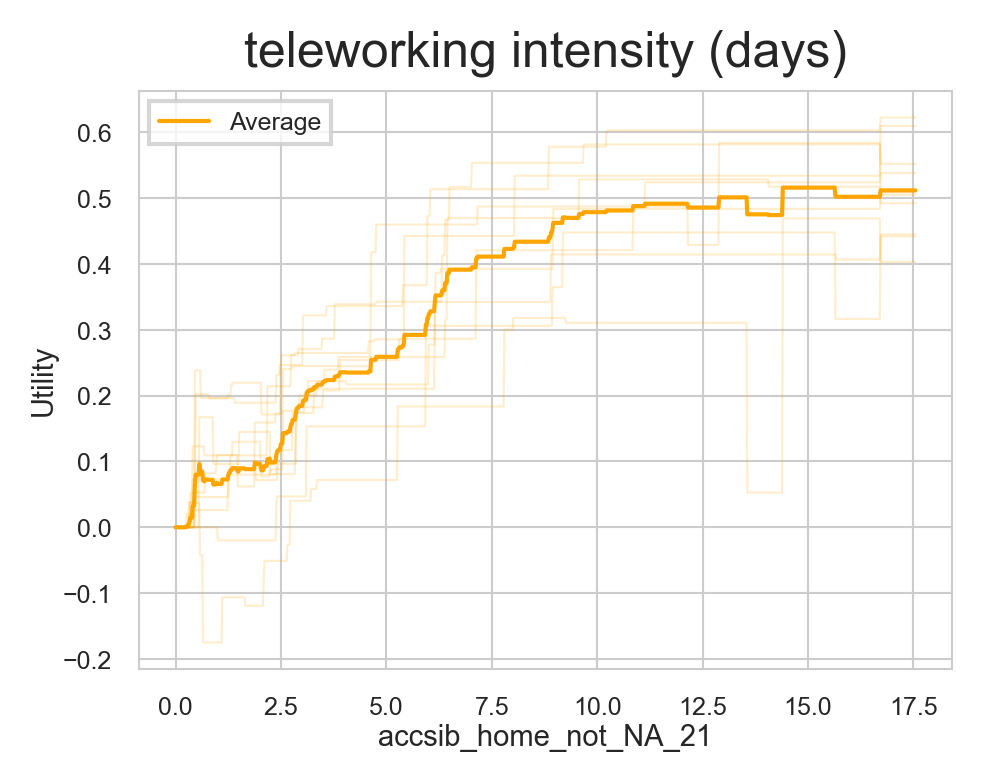

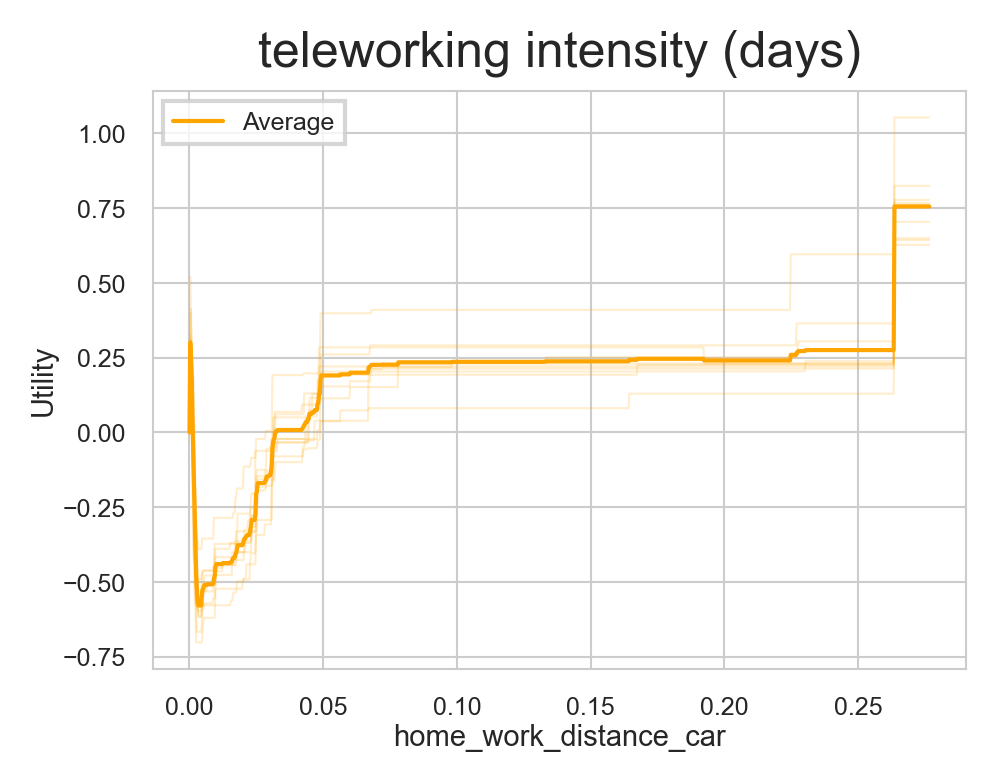

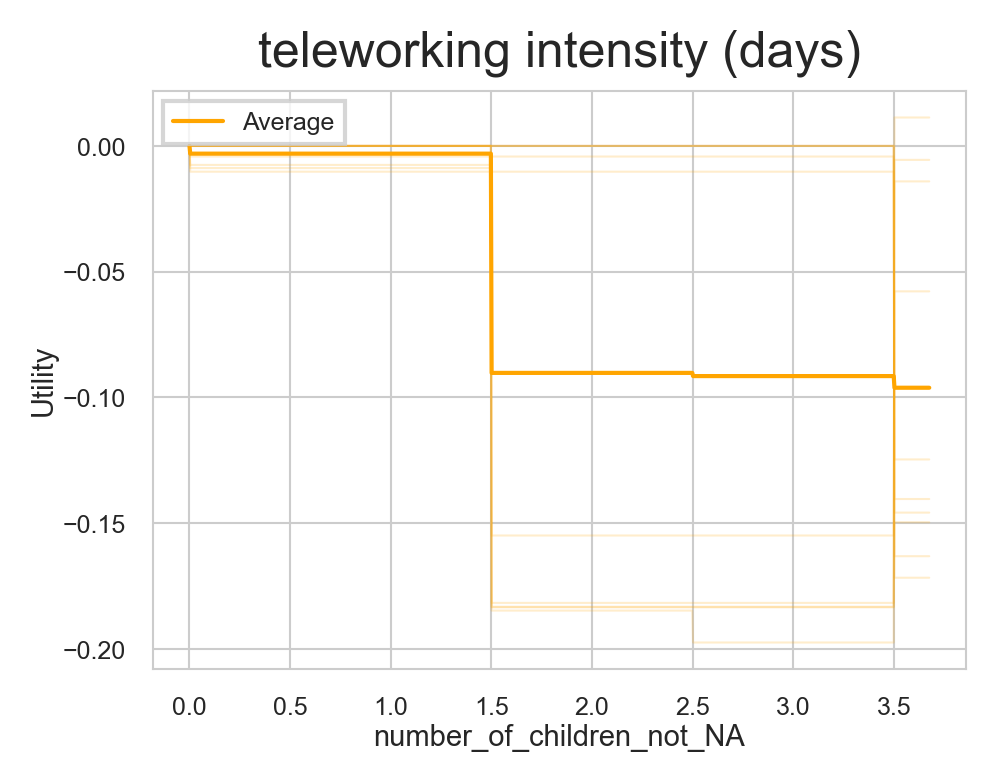

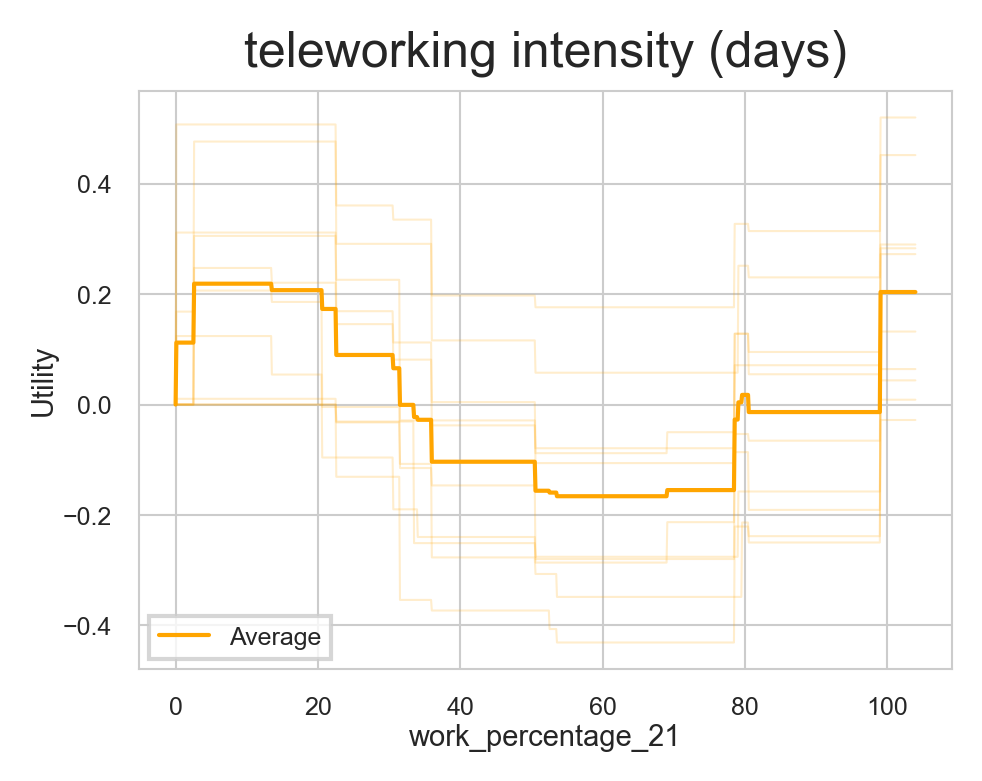

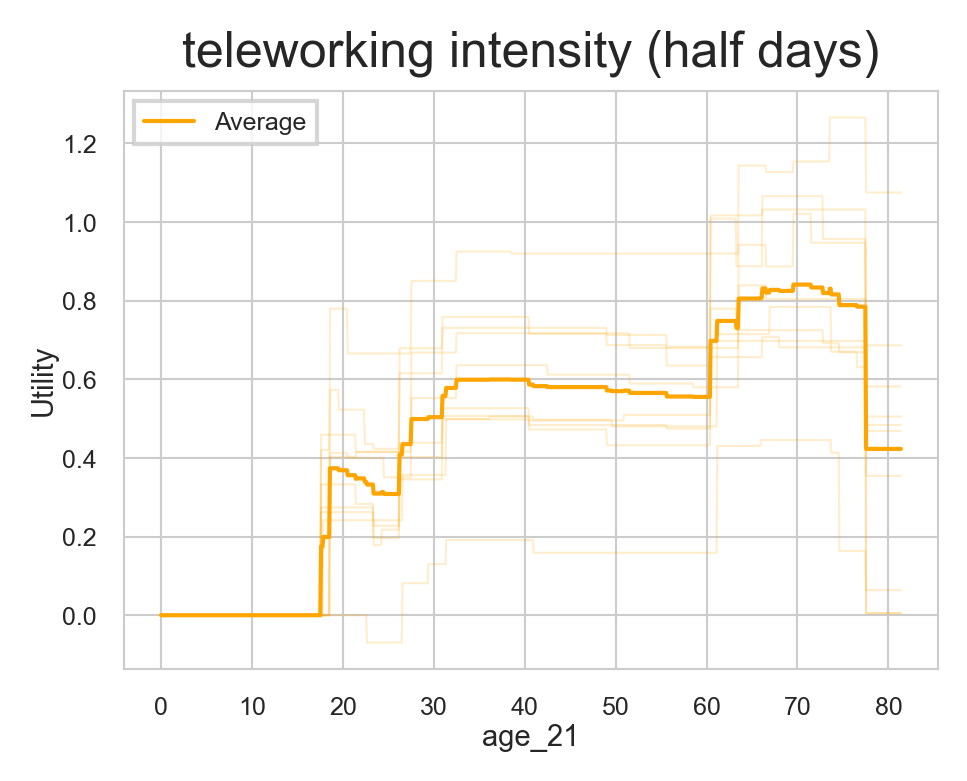

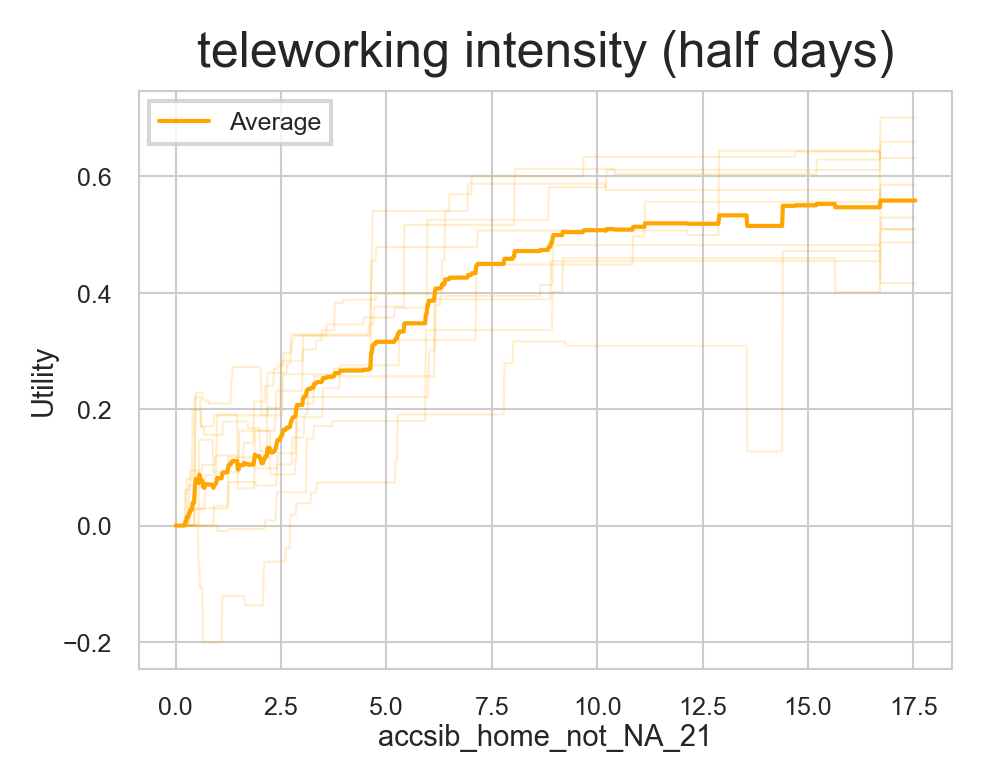

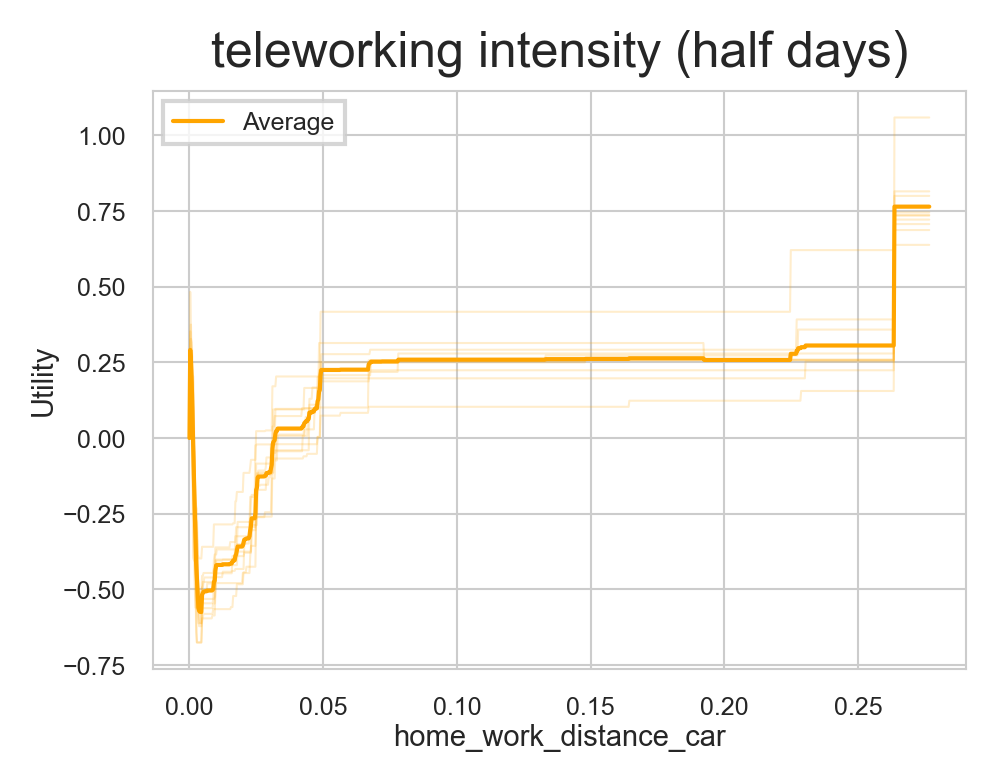

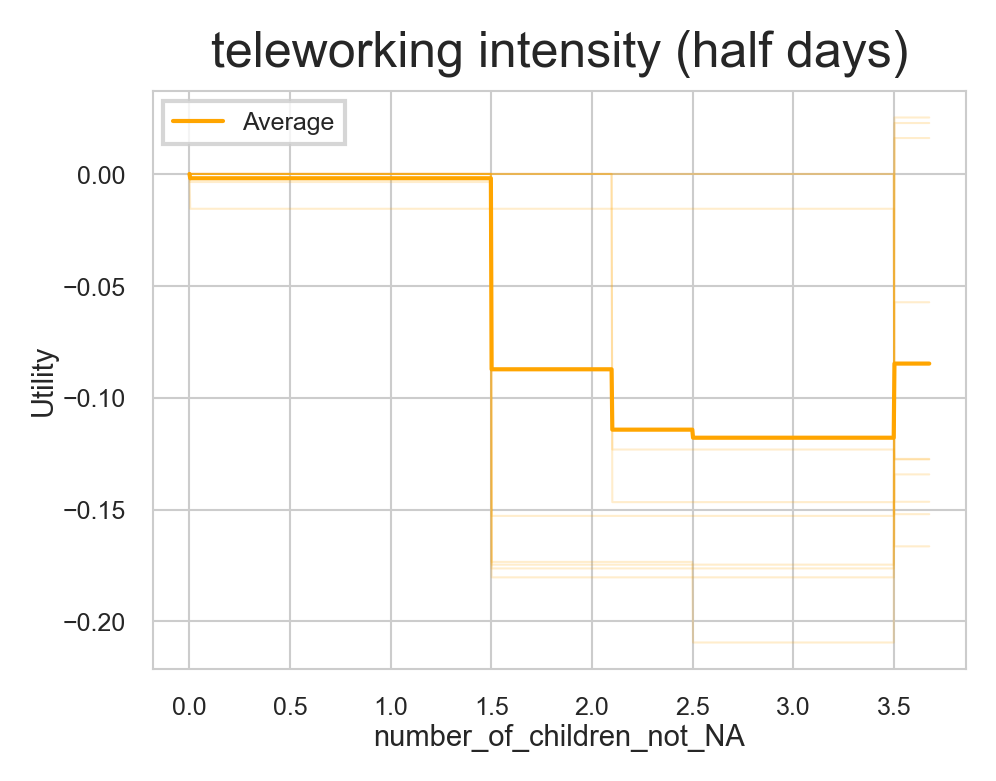

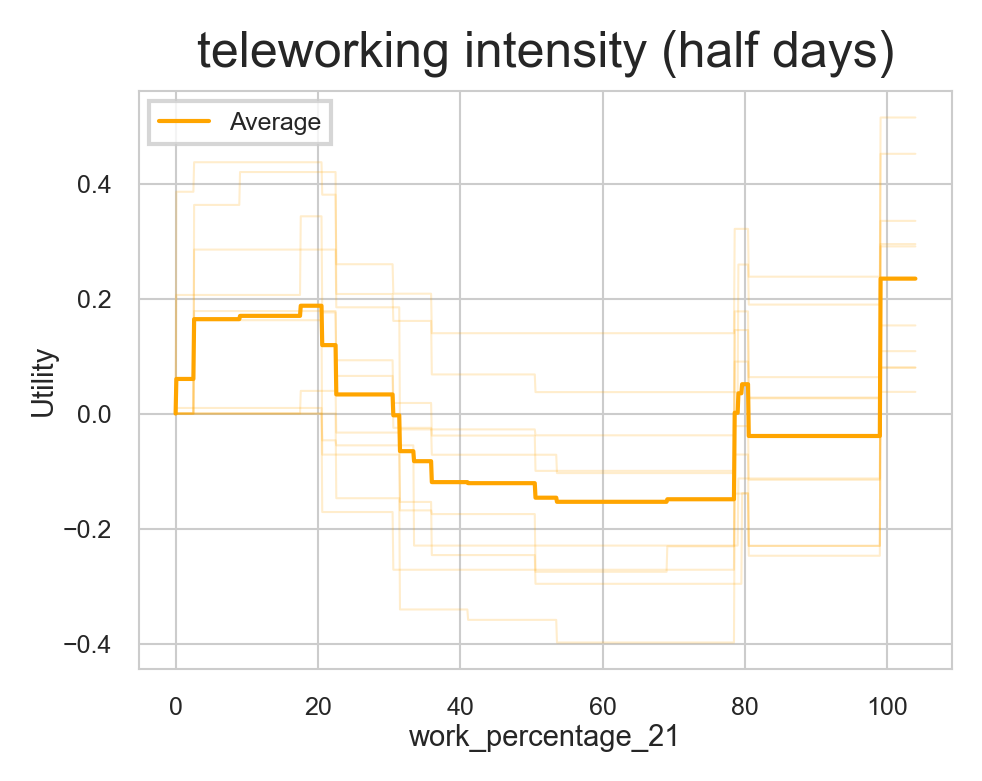

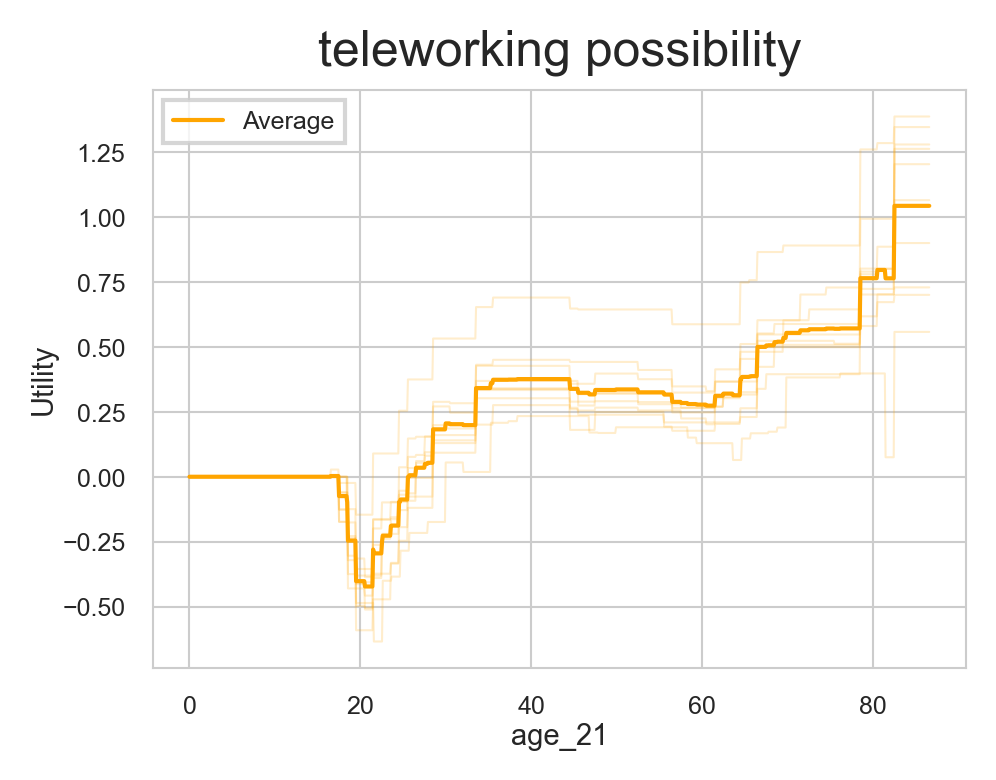

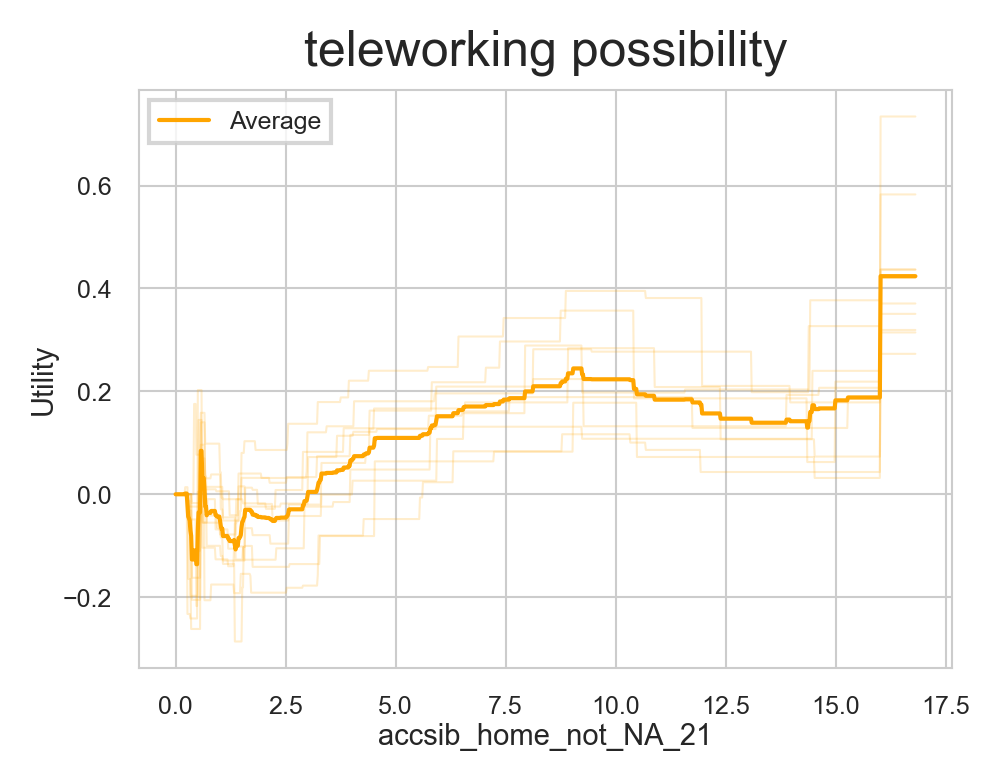

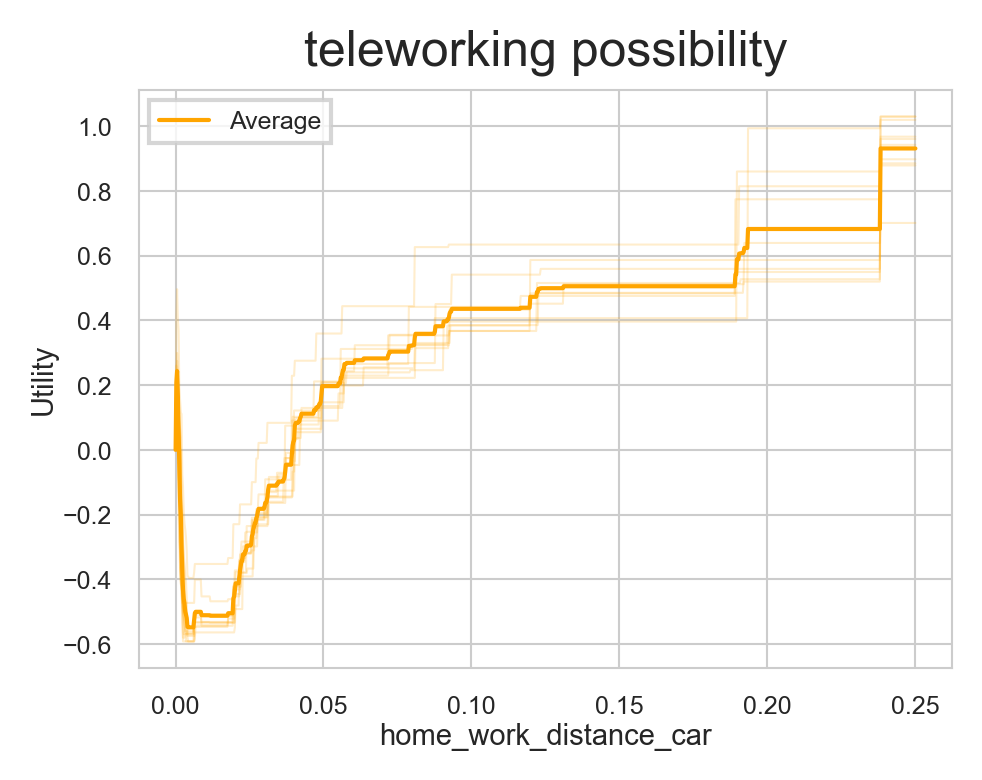

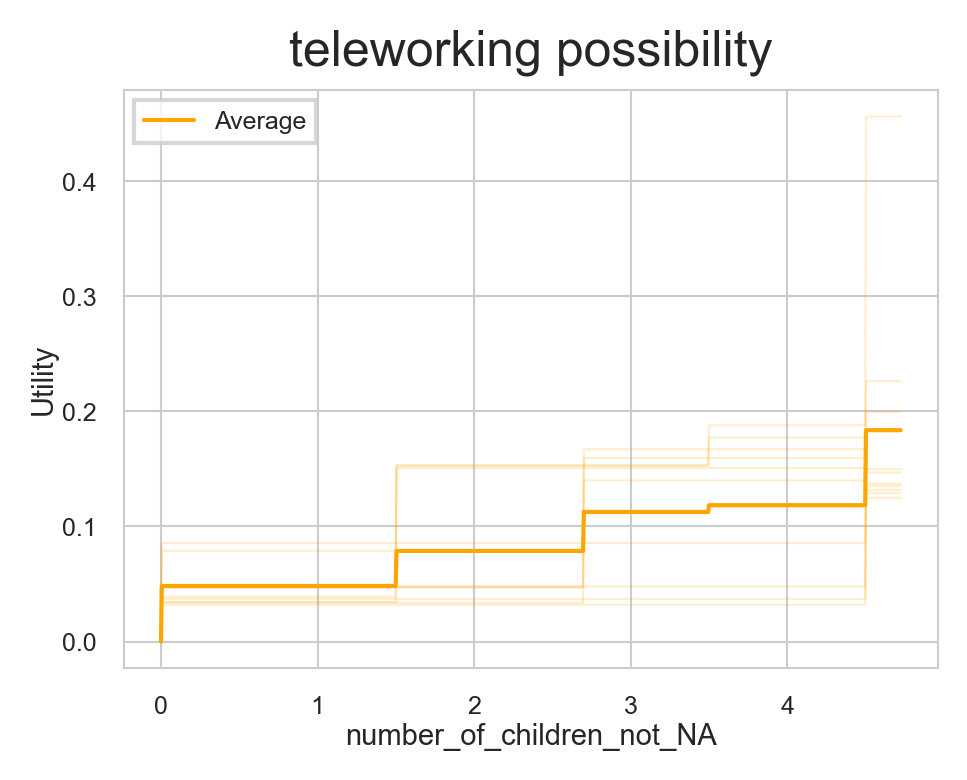

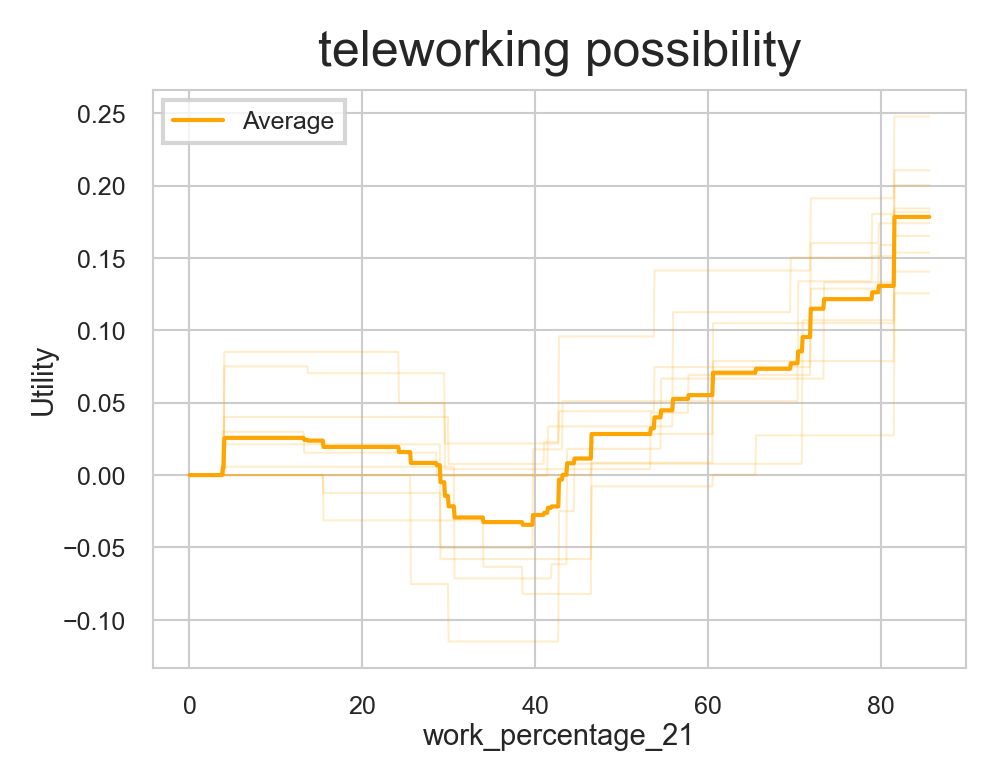

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

pd.option_context("mode.use_inf_as_na", True)
tex_fonts = {
    # Use LaTeX to write all text
    # "text.usetex": True,
    # "font.family": "serif",
    # "font.serif": "Computer Modern Roman",
    # Use 14pt font in plots, to match 10pt font in document
    "axes.labelsize": 7,
    "axes.linewidth": 0.5,
    "axes.labelpad": 1,
    "font.size": 7,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 6,
    "legend.fancybox": False,
    "legend.edgecolor": "inherit",
    "legend.borderaxespad": 0.4,
    "legend.borderpad": 0.4,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6,
    "xtick.major.pad": 0.5,
    "ytick.major.pad": 0.5,
    "grid.linewidth": 0.5,
    "lines.linewidth": 0.8,
}
sns.set_theme(font_scale=1, rc=tex_fonts)
sns.set_style("whitegrid")
title_names = ["teleworking intensity (days)", "teleworking intensity (half days)", "teleworking possibility"]
ufs_dict = {}
for k, (i, l) in enumerate(all_weights.items()):
    for f in nonlin_params_name:
        ufs_dict[f] = {
            "xplot": np.linspace(0, 1.05 * l[0][f]["Splitting points"][-1], 1000),
            "yarr": np.array([]),
            "yav": [],
        }
        yi = []
        for weights in l:
            _, y = non_lin_function(weights[f], 0, 1.05 * weights[f]["Splitting points"][-1], 1000)
            yi.append([yii - y[0] for yii in y])
        ufs_dict[f]["yarr"] = np.array(yi)
        ufs_dict[f]["yav"] = ufs_dict[f]["yarr"].mean(axis=0)

        x, y = ufs_dict[f]["xplot"], ufs_dict[f]["yav"]
        fig, ax = plt.subplots(figsize=(3.5, 2.5), dpi = 300)
        sns.lineplot(
            x=x, y=y, ax=ax, color="orange", linewidth=1, label="Average"
        )
        for i in range(len(l)):
            sns.lineplot(
                x=x,
                y=ufs_dict[f]["yarr"][i, :].T,
                color="orange",
                alpha=0.2,
                ax=ax,
                linewidth=0.5,
            )
        ax.set_title(title_names[k])
        ax.set_xlabel(f)
        ax.set_ylabel("Utility")

Note for the paper:

- Plot of all 10 models for each non-linear parameter and each choice situation
- Bold line denotes average, and lines with more transparency are individual models

## "Linearisation" of RUMBoost non linear features

Completely arbitrary, I think that we will have to justify it strongly in the paper.

c:\Users\ucesnjs\anaconda32\envs\old_rumboost\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ucesnjs\anaconda32\envs\old_rumboost\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ucesnjs\anaconda32\envs\old_rumboost\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ucesnjs\anaconda32\envs\old_rumboost\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

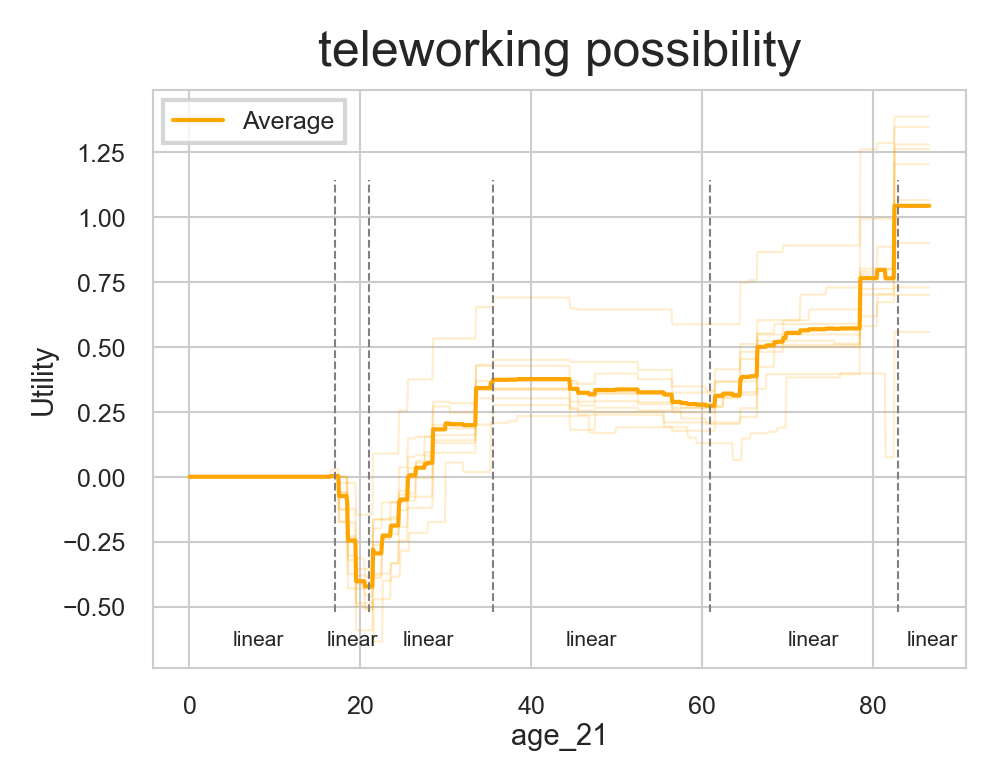

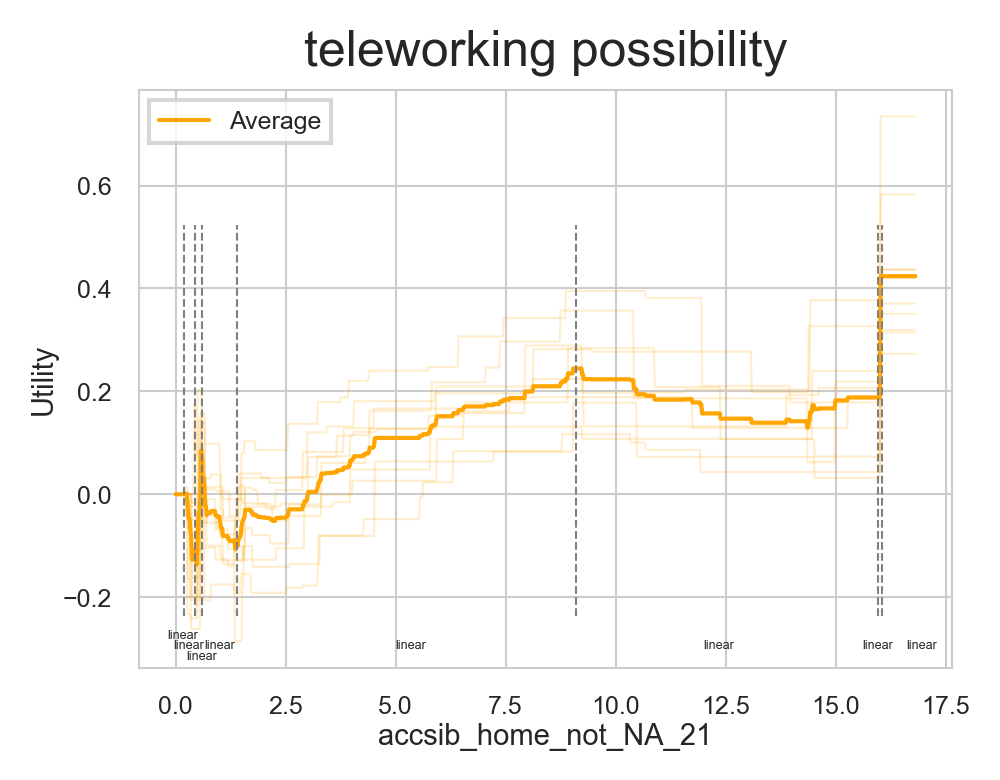

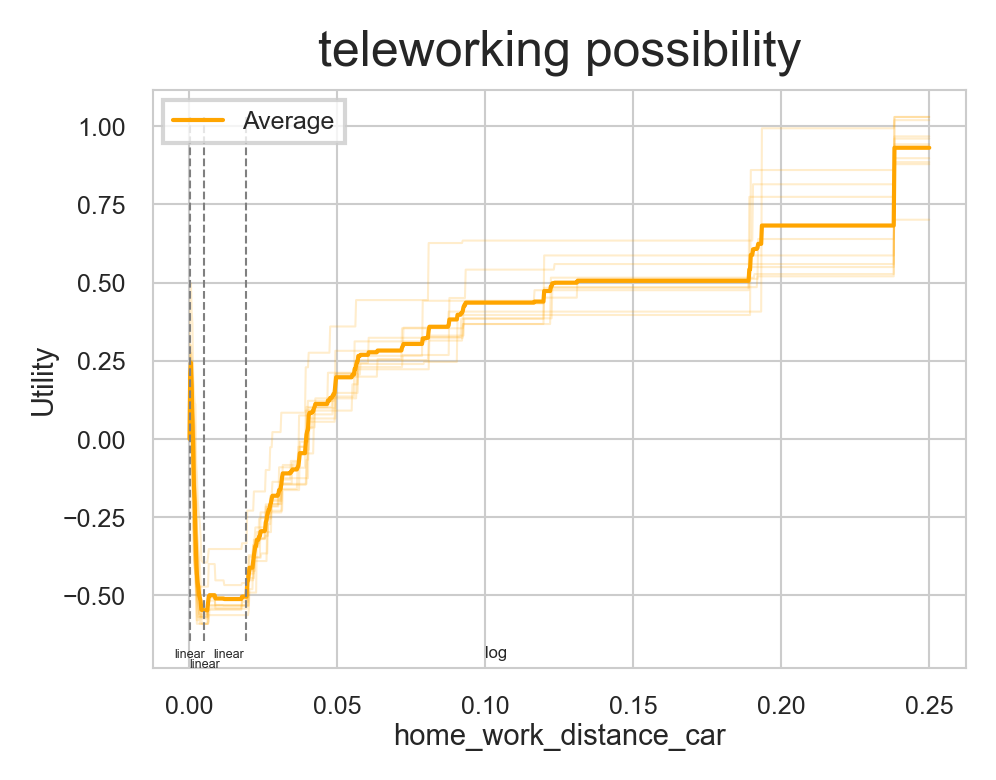

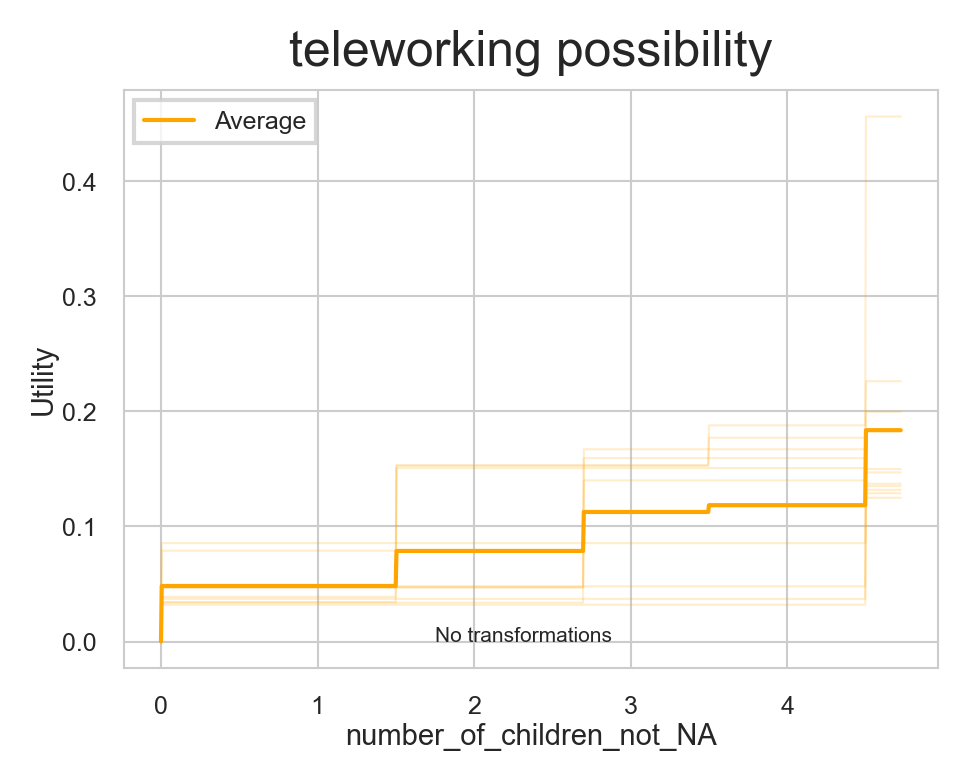

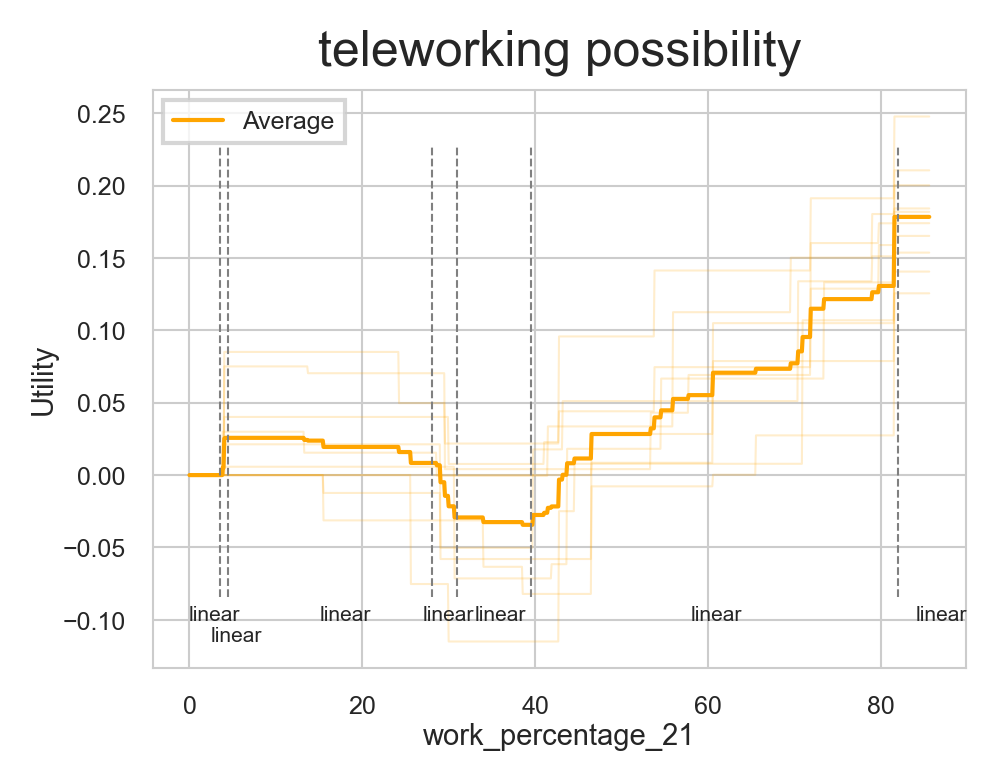

In [70]:
title_names = ["teleworking intensity (days)", "teleworking intensity (half days)", "teleworking possibility"]
ufs_dict = {}
for k, (i, l) in enumerate(all_weights.items()):
    if k < 2:
        continue
    for f in nonlin_params_name:
        ufs_dict[f] = {
            "xplot": np.linspace(0, 1.05 * l[0][f]["Splitting points"][-1], 1000),
            "yarr": np.array([]),
            "yav": [],
        }
        yi = []
        for weights in l:
            _, y = non_lin_function(weights[f], 0, 1.05 * weights[f]["Splitting points"][-1], 1000)
            yi.append([yii - y[0] for yii in y])
        ufs_dict[f]["yarr"] = np.array(yi)
        ufs_dict[f]["yav"] = ufs_dict[f]["yarr"].mean(axis=0)

        x, y = ufs_dict[f]["xplot"], ufs_dict[f]["yav"]
        fig, ax = plt.subplots(figsize=(3.5, 2.5), dpi = 300)
        sns.lineplot(
            x=x, y=y, ax=ax, color="orange", linewidth=1, label="Average"
        )
        for i in range(len(l)):
            sns.lineplot(
                x=x,
                y=ufs_dict[f]["yarr"][i, :].T,
                color="orange",
                alpha=0.2,
                ax=ax,
                linewidth=0.5,
            )
        
        
        if f =="age_21":
            plt.text(5, -0.65, "linear", fontsize=5)
            ax.vlines(x=17, ymin=ufs_dict[f]["yav"].min()-0.1, ymax=ufs_dict[f]["yav"].max()+0.1, color="gray", linestyle="--", linewidth=0.5)
            plt.text(16, -0.65, "linear", fontsize=5)
            ax.vlines(x=21, ymin=ufs_dict[f]["yav"].min()-0.1, ymax=ufs_dict[f]["yav"].max()+0.1, color="gray", linestyle="--", linewidth=0.5)
            plt.text(25, -0.65, "linear", fontsize=5)
            ax.vlines(x=35.5, ymin=ufs_dict[f]["yav"].min()-0.1, ymax=ufs_dict[f]["yav"].max()+0.1, color="gray", linestyle="--", linewidth=0.5)
            plt.text(44, -0.65, "linear", fontsize=5)
            ax.vlines(x=61, ymin=ufs_dict[f]["yav"].min()-0.1, ymax=ufs_dict[f]["yav"].max()+0.1, color="gray", linestyle="--", linewidth=0.5)
            plt.text(70, -0.65, "linear", fontsize=5)
            ax.vlines(x=83, ymin=ufs_dict[f]["yav"].min()-0.1, ymax=ufs_dict[f]["yav"].max()+0.1, color="gray", linestyle="--", linewidth=0.5)
            plt.text(84, -0.65, "linear", fontsize=5)
        elif f == "accsib_home_not_NA_21":
            plt.text(-0.2, -0.28, "linear", fontsize=3)
            ax.vlines(x=0.2, ymin=ufs_dict[f]["yav"].min()-0.1, ymax=ufs_dict[f]["yav"].max()+0.1, color="gray", linestyle="--", linewidth=0.5)
            plt.text(-0.05, -0.3, "linear", fontsize=3)
            ax.vlines(x=0.45, ymin=ufs_dict[f]["yav"].min()-0.1, ymax=ufs_dict[f]["yav"].max()+0.1, color="gray", linestyle="--", linewidth=0.5)
            plt.text(0.25, -0.32, "linear", fontsize=3)
            ax.vlines(x=0.6, ymin=ufs_dict[f]["yav"].min()-0.1, ymax=ufs_dict[f]["yav"].max()+0.1, color="gray", linestyle="--", linewidth=0.5)
            plt.text(0.65, -0.3, "linear", fontsize=3)
            ax.vlines(x=1.4, ymin=ufs_dict[f]["yav"].min()-0.1, ymax=ufs_dict[f]["yav"].max()+0.1, color="gray", linestyle="--", linewidth=0.5)
            plt.text(5, -0.3, "linear", fontsize=3)
            ax.vlines(x=9.1, ymin=ufs_dict[f]["yav"].min()-0.1, ymax=ufs_dict[f]["yav"].max()+0.1, color="gray", linestyle="--", linewidth=0.5)
            plt.text(12, -0.3, "linear", fontsize=3)
            ax.vlines(x=15.95, ymin=ufs_dict[f]["yav"].min()-0.1, ymax=ufs_dict[f]["yav"].max()+0.1, color="gray", linestyle="--", linewidth=0.5)
            plt.text(15.6, -0.3, "linear", fontsize=3)
            ax.vlines(x=16.05, ymin=ufs_dict[f]["yav"].min()-0.1, ymax=ufs_dict[f]["yav"].max()+0.1, color="gray", linestyle="--", linewidth=0.5)
            plt.text(16.6, -0.3, "linear", fontsize=3)
        elif f == "home_work_distance_car":
            plt.text(-0.005, -0.7, "linear", fontsize=3)
            ax.vlines(x=0.0001, ymin=ufs_dict[f]["yav"].min()-0.1, ymax=ufs_dict[f]["yav"].max()+0.1, color="gray", linestyle="--", linewidth=0.5)
            plt.text(0, -0.73, "linear", fontsize=3)
            ax.vlines(x=0.005, ymin=ufs_dict[f]["yav"].min()-0.1, ymax=ufs_dict[f]["yav"].max()+0.1, color="gray", linestyle="--", linewidth=0.5)
            plt.text(0.008, -0.7, "linear", fontsize=3) 
            ax.vlines(x=0.019, ymin=ufs_dict[f]["yav"].min()-0.1, ymax=ufs_dict[f]["yav"].max()+0.1, color="gray", linestyle="--", linewidth=0.5)
            plt.text(0.10, -0.7, "log", fontsize=4)
        elif f == "number_of_children_not_NA":
            plt.text(1.75, 0, "No transformations", fontsize=5)
        elif f == "work_percentage_21":
            plt.text(-0.1, -0.1, "linear", fontsize=5)
            ax.vlines(x=3.5, ymin=ufs_dict[f]["yav"].min()-0.05, ymax=ufs_dict[f]["yav"].max()+0.05, color="gray", linestyle="--", linewidth=0.5)
            plt.text(2.5, -0.115, "linear", fontsize=5)
            ax.vlines(x=4.5, ymin=ufs_dict[f]["yav"].min()-0.05, ymax=ufs_dict[f]["yav"].max()+0.05, color="gray", linestyle="--", linewidth=0.5)
            plt.text(15, -0.1, "linear", fontsize=5)
            ax.vlines(x=28, ymin=ufs_dict[f]["yav"].min()-0.05, ymax=ufs_dict[f]["yav"].max()+0.05, color="gray", linestyle="--", linewidth=0.5)
            plt.text(27, -0.1, "linear", fontsize=5)
            ax.vlines(x=31, ymin=ufs_dict[f]["yav"].min()-0.05, ymax=ufs_dict[f]["yav"].max()+0.05, color="gray", linestyle="--", linewidth=0.5)
            plt.text(33, -0.1, "linear", fontsize=5)
            ax.vlines(x=39.5, ymin=ufs_dict[f]["yav"].min()-0.05, ymax=ufs_dict[f]["yav"].max()+0.05, color="gray", linestyle="--", linewidth=0.5)
            plt.text(58, -0.1, "linear", fontsize=5)
            ax.vlines(x=82, ymin=ufs_dict[f]["yav"].min()-0.05, ymax=ufs_dict[f]["yav"].max()+0.05, color="gray", linestyle="--", linewidth=0.5)
            plt.text(84, -0.1, "linear", fontsize=5)
        ax.set_title(title_names[k])
        ax.set_xlabel(f)
        ax.set_ylabel("Utility")


## Constant calibration

We recalibrate ASCs and thresholds to make the model suitable for forecasting. I had to add a learning rate in the formula of Train because otherwise, it could jump back and forth over the solution, without reaching the tolerance (especially with thresholds). And I also increased the tolerance by a factor of 2 every 100 iterations.

In [104]:
%load_ext autoreload
%autoreload 2
from src.simba.mobi.choice.models.homeoffice.constants_calibration import calibrate_constants

models = ["linearised_model", "dcm", "rumboost"]
intensity = [20, 10, 0]
n_runs = 10

for m in models:
    for i in intensity:
        if m == "linearised_model" and i > 0:
            continue
        for n in range(n_runs):
            model, data = calibrate_constants(m, i, n, tol=1e-3)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
ASC calibrated for model linearised_model and run 0
ASC calibrated for model linearised_model and run 1
ASC calibrated for model linearised_model and run 2
ASC calibrated for model linearised_model and run 3
ASC calibrated for model linearised_model and run 4
ASC calibrated for model linearised_model and run 5
ASC calibrated for model linearised_model and run 6
ASC calibrated for model linearised_model and run 7
ASC calibrated for model linearised_model and run 8
ASC calibrated for model linearised_model and run 9
threshold 0 calibrated for model dcm and run 0
threshold 1 calibrated for model dcm and run 0
threshold 2 calibrated for model dcm and run 0
threshold 3 calibrated for model dcm and run 0
threshold 4 calibrated for model dcm and run 0
threshold 0 calibrated for model dcm and run 1
threshold 1 calibrated for model dcm and run 1
threshold 2 calibrated for model dcm and run 1
threshold 3 cali

## Metrics with calibration and linearised model

In [112]:
#load results
import pandas as pd
import numpy as np
import os
results_directory = os.getcwd() + r"\homeoffice\models\estimation\2021"
n_runs = 10
model = ["dcm", "linearised_model", "rumboost"]
intensity = [20, 10, 0]

indices = [
    ('dcm', 'teleworking intensity (days)', 'train'),
    ('dcm', 'teleworking intensity (days)', 'test'),
    ('dcm', 'teleworking intensity (half days)', 'train'),
    ('dcm', 'teleworking intensity (half days)', 'test'),
    ('dcm', 'teleworking possibility', 'train'),
    ('dcm', 'teleworking possibility', 'test'),
    ('linearised_model', 'teleworking possibility', 'train'),
    ('linearised_model', 'teleworking possibility', 'test'),
    ('rumboost', 'teleworking intensity (days)', 'train'),
    ('rumboost', 'teleworking intensity (days)', 'test'),
    ('rumboost', 'teleworking intensity (half days)', 'train'),
    ('rumboost', 'teleworking intensity (half days)', 'test'),
    ('rumboost', 'teleworking possibility', 'train'),
    ('rumboost', 'teleworking possibility', 'test')
]
df = pd.DataFrame({}, columns=["CEL", "MAE", "MSE", "EMAE", "EMSE"], index=pd.MultiIndex.from_tuples(indices, names=["model", "type", "task"]))
std_df = pd.DataFrame({}, columns=["CEL", "MAE", "MSE", "EMAE", "EMSE"], index=pd.MultiIndex.from_tuples(indices, names=["model", "type", "task"]))
for m in model:
  for i in intensity:
    if m == "linearised_model" and i > 0:
        continue
    data = []
    for j in range(n_runs):
        if i > 0 and m == "dcm":
            results_file = f"{results_directory}/metrics_wfh_intensity{i}_seed{j}_calibrated.csv"
            index = ["train", "test"]
            cols = ["CEL", "MAE", "MSE", "EMAE", "EMSE"]
        elif i > 0 and m == "linearised_model":
            results_file = f"{results_directory}/lm_metrics_wfh_intensity{i}_seed{j}_calibrated.csv"
            index = ["train", "test"]
            cols = ["CEL", "MAE", "MSE", "EMAE", "EMSE"]
        elif i > 0 and m == "rumboost":
            results_file = f"{results_directory}/rumboost_metrics_wfh_intensity{i}_seed{j}_calibrated.csv"
            index = ["train", "test"]
            cols = ["CEL", "MAE", "MSE", "EMAE", "EMSE"]
        elif i == 0 and m == "dcm":
            results_file = f"{results_directory}/metrics_wfh_possibility_seed{j}_calibrated.csv"
            index = ["train", "test"]
            cols = ["CEL"]
        elif i == 0 and m == "linearised_model":
            results_file = f"{results_directory}/lm_metrics_wfh_possibility_seed{j}_calibrated.csv"
            index = ["train", "test"]
            cols = ["CEL"]
        elif i == 0 and m == "rumboost":
            results_file = f"{results_directory}/rumboost_metrics_wfh_possibility_seed{j}_calibrated.csv"
            index = ["train", "test"]
            cols = ["CEL"]
        with open(results_file, "r") as f:
            data.append(pd.read_csv(f, index_col=0).loc[index, :].values)

    if i == 20:
        iterables = [[m], [f"teleworking intensity (days)"], ["train", "test"]]
    elif i == 10:
        iterables = [[m], [f"teleworking intensity (half days)"], ["train", "test"]]
    elif i == 0:
        iterables = [[m], [f"teleworking possibility"], ["train", "test"]]
    
    mulitindex = pd.MultiIndex.from_product(iterables, names=["model", "type", "task"])

    df.loc[mulitindex, cols] = np.array(data).mean(axis=0)
    std_df.loc[mulitindex, cols] = np.array(data).std(axis=0)

In [113]:
formatted_df = df.pivot_table(index=["type", "model"], columns="task").map(lambda x: f"{x:.3f}" if not pd.isna(x) else "NaN") + " (± " + std_df.pivot_table(index=["type", "model"], columns="task").map(lambda x: f"{x:.3f}" if not pd.isna(x) else "NaN") + ")"

formatted_df.replace("NaN (± NaN)", "-")


CEL  \
task                                                           test   
type                              model                               
teleworking intensity (days)      dcm               1.674 (± 0.012)   
                                  rumboost          1.661 (± 0.012)   
teleworking intensity (half days) dcm               2.174 (± 0.008)   
                                  rumboost          2.162 (± 0.009)   
teleworking possibility           dcm               0.560 (± 0.004)   
                                  linearised_model  0.558 (± 0.004)   
                                  rumboost          0.556 (± 0.004)   

                                                                     \
task                                                          train   
type                              model                               
teleworking intensity (days)      dcm               1.665 (± 0.003)   
                                  rumboost          1.648 (± 0.003)   
teleworking intensity (half days) dcm               2.167 (± 0.002)   
                                  rumboost          2.150 (± 0.002)   
teleworking possibility           dcm               0.559 (± 0.001)   
                                  linearised_model  0.556 (± 0.001)   
                                  rumboost          0.552 (± 0.001)   

                                                               EMAE  \
task                                                           test   
type                              model                               
teleworking intensity (days)      dcm               1.930 (± 0.006)   
                                  rumboost          1.903 (± 0.005)   
teleworking intensity (half days) dcm               3.977 (± 0.011)   
                                  rumboost          3.920 (± 0.008)   
teleworking possibility           dcm                             -   
                                  linearised_model                -   
                                  rumboost                        -   

                                                                     \
task                                                          train   
type                              model                               
teleworking intensity (days)      dcm               1.922 (± 0.003)   
                                  rumboost          1.889 (± 0.003)   
teleworking intensity (half days) dcm               3.962 (± 0.005)   
                                  rumboost          3.891 (± 0.007)   
teleworking possibility           dcm                             -   
                                  linearised_model                -   
                                  rumboost                        -   

                                                                EMSE  \
task                                                            test   
type                              model                                
teleworking intensity (days)      dcm                6.032 (± 0.023)   
                                  rumboost           5.909 (± 0.023)   
teleworking intensity (half days) dcm               25.456 (± 0.095)   
                                  rumboost          24.894 (± 0.069)   
teleworking possibility           dcm                              -   
                                  linearised_model                 -   
                                  rumboost                         -   

                                                                      \
task                                                           train   
type                              model                                
teleworking intensity (days)      dcm                5.997 (± 0.015)   
                                  rumboost           5.845 (± 0.013)   
teleworking intensity (half days) dcm               25.317 (± 0.052)   
                                  rumboost          24.625 (± 0.056

## Parameters with calibration and linearised model

In [117]:
#load results
import pandas as pd
import numpy as np
import os
import glob
import sys
sys.path.insert(0,os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir, os.pardir, os.pardir, os.pardir, os.pardir)))
from src.simba.mobi.rumboost.rumboost import RUMBoost
from src.simba.mobi.rumboost.utility_plotting import weights_to_plot_v2, non_lin_function

results_directory = os.getcwd() + r"\homeoffice\models\estimation\2021"
n_runs = 10

model = ["dcm", "linearised_model", "rumboost"]
# model = ["dcm"]
intensity = [20, 10, 0]

indices = [
    ('dcm', 'teleworking intensity (days)'),
    ('dcm', 'teleworking intensity (half days)'),
    ('dcm', 'teleworking possibility'),
    ('linearised_model', 'teleworking possibility'),
    ('rumboost', 'teleworking intensity (days)'),
    ('rumboost', 'teleworking intensity (half days)'),
    ('rumboost', 'teleworking possibility')
]

index = ['alternative_specific_constant', 'b_executives_21', 'b_falc_id_NA',
        'b_general_abo_halbtax', 'b_german_speaking',
        'b_hh_income_8000_or_less', 'b_hh_income_na',
        'b_hh_income_2000_to_4000', 'b_hh_income_4001_to_6000', 'b_hh_income_6001_to_8000',
        'b_home_work_distance_car_NA', 'b_is_falc_id_6to9_1_21',
        'b_is_production_1_21', 
        'b_is_wohlesale_1_21', 'b_no_post_school_education',
        'b_number_of_children', 'b_number_of_children_NA',
        'b_secondary_education', 'b_single_houshold', 'b_tertiary_education',
        'beta_accsib_home_not_NA_5_10_21', 'beta_age_21_18_35',
        'beta_home_work_distance_car_0_0.15', 
        'beta_work_percentage_95_101_20_21',
        'b_home_work_distance_car_long',
        'beta_accsib_home_not_NA_21_0.2_0.45',
        'beta_accsib_home_not_NA_21_0.45_0.6',
        'beta_accsib_home_not_NA_21_0.6_1.4',
        'beta_accsib_home_not_NA_21_1.4_9.1',
        'beta_accsib_home_not_NA_21_15_95',
        'beta_accsib_home_not_NA_21_9.1_15',
        'beta_accsib_home_not_NA_21_95_16.05',
        'beta_age_21_17_21',
        'beta_age_21_21_35',
        'beta_age_21_35_61',
        'beta_age_21_61_83',
        'beta_home_work_distance_car_short_0.0001_0.005',
        'beta_home_work_distance_car_short_0.005_0.19',
        'beta_work_percentage_21_28_31',
        'beta_work_percentage_21_3.5_4.5',
        'beta_work_percentage_21_31_39',
        'beta_work_percentage_21_39_84',
        'beta_work_percentage_21_4.5_28',
        'tau_1', 'tau_1_diff_1',
        'tau_1_diff_2', 'tau_1_diff_3', 'tau_1_diff_4', 'tau_1_diff_5',
        'tau_1_diff_6', 'tau_1_diff_7', 'tau_1_diff_8', 'tau_1_diff_9']

rename_params = {
    "home_work_distance_car": "beta_home_work_distance_car_0_0.15",
    "accsib_home_not_NA_21": "beta_accsib_home_not_NA_5_10_21",
    "secondary_education": "b_secondary_education",
    "work_percentage_21": "beta_work_percentage_95_101_20_21",
    "business_sector_wholesale_21": "b_is_wohlesale_1_21",
    "number_of_children_not_NA": "b_number_of_children",
    "business_sector_production_21": "b_is_production_1_21",
    "tertiary_education": "b_tertiary_education",
    "fal_id_NA": "b_falc_id_NA",
    "hh_income_6001_to_8000": "b_hh_income_6001_to_8000",
    "age_21": "beta_age_21_18_35",
    "executives_21": "b_executives_21",
    "german_speaking": "b_german_speaking",
    "no_post_school_educ": "b_no_post_school_education",
    "hh_income_2000_to_4000": "b_hh_income_2000_to_4000",
    "hh_income_4001_to_6000": "b_hh_income_4001_to_6000",
    "hh_income_na": "b_hh_income_na",
    "single_household": "b_single_houshold",
    "is_falc_id_6to9_21": "b_is_falc_id_6to9_1_21",
}

nonlin_params = ["beta_age_21_18_35", "beta_accsib_home_not_NA_5_10_21", "beta_home_work_distance_car_0_0.15", "b_number_of_children", "beta_work_percentage_95_101_20_21"] #nonlinear parameters in the RUMBoost model
nonlin_params_name = ["age_21", "accsib_home_not_NA_21", "home_work_distance_car", "number_of_children_not_NA", "work_percentage_21"]
thresholds_names = ["tau_1", "tau_1_diff_1", "tau_1_diff_2", "tau_1_diff_3", "tau_1_diff_4", "tau_1_diff_5", "tau_1_diff_6", "tau_1_diff_7", "tau_1_diff_8", "tau_1_diff_9"]

df = pd.DataFrame({}, columns=pd.MultiIndex.from_tuples(indices, names=["model", "type"]), index=index)
std_df = pd.DataFrame({}, columns=pd.MultiIndex.from_tuples(indices, names=["model", "type"]), index=index)
sign_df = pd.DataFrame({}, columns=pd.MultiIndex.from_tuples(indices, names=["model", "type"]), index=index)
all_weights = {}

for m in model:
  for i in intensity:
    if m == "linearised_model" and i > 0:
        continue
    if i == 20:
        cols = pd.MultiIndex.from_product([[m], ["teleworking intensity (days)"]])
    elif i == 10:
        cols = pd.MultiIndex.from_product([[m], ["teleworking intensity (half days)"]])
    elif i == 0:
        cols = pd.MultiIndex.from_product([[m], ["teleworking possibility"]])
    data = []
    significance = []
    all_weights[i] = []
    for j in range(n_runs):


        if m == "dcm":
            if i > 0:
                results_file = glob.glob(f"{results_directory}/parameters_dcm_wfh_intensity{i}_seed{j}_calibrated.csv")[0]
            else:
                results_file = glob.glob(f"{results_directory}/parameters_dcm_wfh_possibility_seed{j}_calibrated.csv")[0]
            with open(results_file, "r") as f:
                df_dcm = pd.read_csv(f, index_col=0)
                index = df_dcm.index
                data.append(df_dcm["Value"].values)
                significance.append(df_dcm["Rob. p-value"].values)

        elif m == "linearised_model":
            if i > 0:
                results_file = glob.glob(f"{results_directory}/parameters_dcm_linearised_wfh_intensity{i}_seed{j}_calibrated.csv")[0]
            else:
                results_file = glob.glob(f"{results_directory}/parameters_dcm_linearised_wfh_possibility_seed{j}_calibrated.csv")[0]
            with open(results_file, "r") as f:
                df_dcm = pd.read_csv(f, index_col=0)
                index = df_dcm.index
                data.append(df_dcm["Value"].values)
                significance.append(df_dcm["Rob. p-value"].values)

        elif m == "rumboost":
            if i > 0:
                results_file = glob.glob(f"{results_directory}/rumboost_model_wfh_intensity{i}_seed{j}_calibrated.json")[0]
            else:
                results_file = glob.glob(f"{results_directory}/rumboost_model_wfh_possibility_seed{j}_calibrated.json")[0]
            rum_model = RUMBoost(model_file=results_file)
            weights = weights_to_plot_v2(rum_model)['0']

            binary_variables = [weights[f]["Histogram values"][1] if f in weights.keys() and len(weights[f]["Splitting points"])==1 else 0 for f in rename_params.keys()]
            index = list(rename_params.values())

            df_rum = pd.DataFrame(binary_variables, columns=cols, index=index)

            df_rum.loc[nonlin_params, :] = -99

            asc = np.sum([v["Histogram values"][0] for v in weights.values()])

            if i > 0:
                df_rum.loc["tau_1", :] = rum_model.thresholds[0] - asc
                for k, t in enumerate(np.diff(rum_model.thresholds)):
                    df_rum.loc[thresholds_names[k+1], :] = t
                index = index + thresholds_names[:len(rum_model.thresholds)]
            else:
                df_rum.loc["alternative_specific_constant", :] = asc + rum_model.asc
                index = index + ["alternative_specific_constant"]

            data.append(df_rum.values)

            all_weights[i].append(weights)

    df.loc[index, cols] = np.array(data).mean(axis=0)
    std_df.loc[index, cols] = np.array(data).std(axis=0)
    if m == "dcm" or m == "linearised_model":
        sign_df.loc[index, cols] = np.array(significance).mean(axis=0)

In [118]:
pd.set_option('future.no_silent_downcasting', True)

formatted_df = df.map(lambda x: f"{x:.3f}" if not pd.isna(x) else "NaN") + " (± " + std_df.map(lambda x: f"{x:.3f}" if not pd.isna(x) else "NaN") + ")" + sign_df.map(lambda x: "***" if x < 0.01 else "**" if x < 0.05 else "*" if x < 0.1 else "")

formatted_df.replace("NaN (± NaN)", "-").replace("-99.000 (± 0.000)", "Non-linear").replace("0.000 (± 0.000)", "-")


model                                                                   dcm  \
type                                           teleworking intensity (days)   
alternative_specific_constant                                             -   
b_executives_21                                          -0.080 (± 0.009)**   
b_falc_id_NA                                             0.658 (± 0.048)***   
b_general_abo_halbtax                                       0.024 (± 0.017)   
b_german_speaking                                        0.182 (± 0.014)***   
b_hh_income_8000_or_less                                -0.135 (± 0.021)***   
b_hh_income_na                                             -0.011 (± 0.025)   
b_hh_income_2000_to_4000                                                  -   
b_hh_income_4001_to_6000                                                  -   
b_hh_income_6001_to_8000                                                  -   
b_home_work_distance_car_NA                                 0.149 (± 0.071)   
b_is_falc_id_6to9_1_21                                   0.409 (± 0.037)***   
b_is_production_1_21                                      0.285 (± 0.043)**   
b_is_wohlesale_1_21                                      0.683 (± 0.056)***   
b_no_post_school_education                                 -0.052 (± 0.053)   
b_number_of_children                                    -0.109 (± 0.006)***   
b_number_of_children_NA                                     0.140 (± 0.072)   
b_secondary_education                                   -0.219 (± 0.016)***   
b_single_houshold                                          -0.087 (± 0.026)   
b_tertiary_education                                    -0.302 (± 0.018)***   
beta_accsib_home_not_NA_5_10_21                          0.064 (± 0.005)***   
beta_age_21_18_35                                        0.024 (± 0.002)***   
beta_home_work_distance_car_0_0.15                       6.147 (± 0.302)***   
beta_work_percentage_95_101_20_21                        0.046 (± 0.003)***   
b_home_work_distance_car_long                                             -   
beta_accsib_home_not_NA_21_0.2_0.45                                       -   
beta_accsib_home_not_NA_21_0.45_0.6                                       -   
beta_accsib_home_not_NA_21_0.6_1.4                                        -   
beta_accsib_home_not_NA_21_1.4_9.1                                        -   
beta_accsib_home_not_NA_21_15_95                                          -   
beta_accsib_home_not_NA_21_9.1_15                                         -   
beta_accsib_home_not_NA_21_95_16.05                                       -   
beta_age_21_17_21                                                         -   
beta_age_21_21_35                                                         -   
beta_age_21_35_61                                                         -   
beta_age_21_61_83                                                         -   
beta_home_work_distance_car_short_0.0001_0.005                            -   
beta_home_work_distance_car_short_0.005_0.19                              -   
beta_work_percentage_21_28_31                                             -   
beta_work_percentage_21_3.5_4.5                                           -   
beta_work_percentage_21_31_39                                             -   
beta_work_percentage_21_39_84                                             -   
beta_work_percentage_21_4.5_28                                            -   
tau_1                                                   -1.077 (± 0.055)***   
tau_1_diff_1                                             1.734 (± 0.020)***   
tau_1_diff_2                                             0.527 (± 0.006)***   
tau_1_diff_3                                             0.578 (± 0.005)***   
tau_1_diff_4                                             0.436 (± 0.008)***   
tau_1_diff_5                                      

## Ordinal models with all variables

### Constant calibration

In [23]:
%load_ext autoreload
%autoreload 2
from src.simba.mobi.choice.models.homeoffice.constants_calibration import calibrate_constants

# models = ["dcm", "rumboost"]
models = ["linearised_model"]
intensity = [0]
n_runs = 10

for m in models:
    for i in intensity:
        for n in range(n_runs):
            model, data = calibrate_constants(m, i, n, tol=1e-3, all_vars="_all_vars")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
ASC calibrated for model linearised_model _all_vars and run 0
ASC calibrated for model linearised_model _all_vars and run 1
ASC calibrated for model linearised_model _all_vars and run 2
ASC calibrated for model linearised_model _all_vars and run 3
ASC calibrated for model linearised_model _all_vars and run 4
ASC calibrated for model linearised_model _all_vars and run 5
ASC calibrated for model linearised_model _all_vars and run 6
ASC calibrated for model linearised_model _all_vars and run 7
ASC calibrated for model linearised_model _all_vars and run 8
ASC calibrated for model linearised_model _all_vars and run 9


### Metrics with calibration

In [24]:
#load results
import pandas as pd
import numpy as np
import os
results_directory = os.getcwd() + r"\homeoffice\models\estimation\2021"
n_runs = 10
model = ["dcm", "linearised_model", "rumboost"]
intensity = [20, 0]
all_vars = ["", "_all_vars"]

indices = [
    ('dcm', 'teleworking intensity (20%)', 'train'),
    ('dcm', 'teleworking intensity (20%)', 'test'),
    ('dcm', 'teleworking intensity (20%) all variables', 'train'),
    ('dcm', 'teleworking intensity (20%) all variables', 'test'),
    ('dcm', 'teleworking possibility', 'train'),
    ('dcm', 'teleworking possibility', 'test'),
    ('linearised_model', 'teleworking intensity (20%) all variables', 'train'),
    ('linearised_model', 'teleworking intensity (20%) all variables', 'test'),
    ('linearised_model', 'teleworking possibility', 'train'),
    ('linearised_model', 'teleworking possibility', 'test'),
    ('rumboost', 'teleworking intensity (20%)', 'train'),
    ('rumboost', 'teleworking intensity (20%)', 'test'),
    ('rumboost', 'teleworking intensity (20%) all variables', 'train'),
    ('rumboost', 'teleworking intensity (20%) all variables', 'test'),
    ('rumboost', 'teleworking possibility', 'train'),
    ('rumboost', 'teleworking possibility', 'test')
]
df = pd.DataFrame({}, columns=["CEL", "MAE", "MSE", "EMAE", "EMSE"], index=pd.MultiIndex.from_tuples(indices, names=["model", "type", "task"]))
std_df = pd.DataFrame({}, columns=["CEL", "MAE", "MSE", "EMAE", "EMSE"], index=pd.MultiIndex.from_tuples(indices, names=["model", "type", "task"]))
for m in model:
  for i in intensity:
    for a in all_vars:
        if m == "linearised_model" and i > 0 and a != "_all_vars":
            continue
        if a == "_all_vars" and i == 0:
            continue
        data = []
        for j in range(n_runs):
            if i > 0 and m == "dcm":
                results_file = f"{results_directory}/metrics_wfh_intensity{i}{a}_seed{j}_calibrated.csv"
                index = ["train", "test"]
                cols = ["CEL", "MAE", "MSE", "EMAE", "EMSE"]
            elif i > 0 and m == "linearised_model":
                results_file = f"{results_directory}/lm_metrics_wfh_intensity{i}{a}_seed{j}_calibrated.csv"
                index = ["train", "test"]
                cols = ["CEL", "MAE", "MSE", "EMAE", "EMSE"]
            elif i > 0 and m == "rumboost":
                results_file = f"{results_directory}/rumboost_metrics_wfh_intensity{i}{a}_seed{j}_calibrated.csv"
                index = ["train", "test"]
                cols = ["CEL", "MAE", "MSE", "EMAE", "EMSE"]
            elif i == 0 and m == "dcm":
                results_file = f"{results_directory}/metrics_wfh_possibility_seed{j}_calibrated.csv"
                index = ["train", "test"]
                cols = ["CEL"]
            elif i == 0 and m == "linearised_model":
                results_file = f"{results_directory}/lm_metrics_wfh_possibility_seed{j}_calibrated.csv"
                index = ["train", "test"]
                cols = ["CEL"]
            elif i == 0 and m == "rumboost":
                results_file = f"{results_directory}/rumboost_metrics_wfh_possibility_seed{j}_calibrated.csv"
                index = ["train", "test"]
                cols = ["CEL"]
            with open(results_file, "r") as f:
                data.append(pd.read_csv(f, index_col=0).loc[index, :].values)
        if a:
            a_str = " all variables"
        else:
            a_str = ""
        if i == 20:
            iterables = [[m], [f"teleworking intensity (20%){a_str}"], ["train", "test"]]
        elif i == 10:
            iterables = [[m], [f"teleworking intensity (10%){a_str}"], ["train", "test"]]
        elif i == 0:
            iterables = [[m], ["teleworking possibility"], ["train", "test"]]
        
        mulitindex = pd.MultiIndex.from_product(iterables, names=["model", "type", "task"])

        df.loc[mulitindex, cols] = np.array(data).mean(axis=0)
        std_df.loc[mulitindex, cols] = np.array(data).std(axis=0)

In [25]:
formatted_df = df.pivot_table(index=["type", "model"], columns="task").map(lambda x: f"{x:.3f}" if not pd.isna(x) else "NaN") + " (± " + std_df.pivot_table(index=["type", "model"], columns="task").map(lambda x: f"{x:.3f}" if not pd.isna(x) else "NaN") + ")"

formatted_df.replace("NaN (± NaN)", "-")


CEL  \
task                                                                   test   
type                                      model                               
teleworking intensity (20%)               dcm               1.674 (± 0.012)   
                                          rumboost          1.661 (± 0.012)   
teleworking intensity (20%) all variables dcm               1.668 (± 0.012)   
                                          linearised_model  1.660 (± 0.013)   
                                          rumboost          1.654 (± 0.012)   
teleworking possibility                   dcm               0.560 (± 0.004)   
                                          linearised_model  0.558 (± 0.004)   
                                          rumboost          0.556 (± 0.004)   

                                                                             \
task                                                                  train   
type                                      model                               
teleworking intensity (20%)               dcm               1.665 (± 0.003)   
                                          rumboost          1.648 (± 0.003)   
teleworking intensity (20%) all variables dcm               1.662 (± 0.003)   
                                          linearised_model  1.654 (± 0.003)   
                                          rumboost          1.647 (± 0.003)   
teleworking possibility                   dcm               0.559 (± 0.001)   
                                          linearised_model  0.556 (± 0.001)   
                                          rumboost          0.552 (± 0.001)   

                                                                       EMAE  \
task                                                                   test   
type                                      model                               
teleworking intensity (20%)               dcm               1.930 (± 0.006)   
                                          rumboost          1.903 (± 0.005)   
teleworking intensity (20%) all variables dcm               1.915 (± 0.006)   
                                          linearised_model  1.887 (± 0.007)   
                                          rumboost          1.882 (± 0.007)   
teleworking possibility                   dcm                             -   
                                          linearised_model                -   
                                          rumboost                        -   

                                                                             \
task                                                                  train   
type                                      model                               
teleworking intensity (20%)               dcm               1.922 (± 0.003)   
                                          rumboost          1.889 (± 0.003)   
teleworking intensity (20%) all variables dcm               1.909 (± 0.004)   
                                          linearised_model  1.882 (± 0.004)   
                                          rumboost          1.876 (± 0.004)   
teleworking possibility                   dcm                             -   
                                          linearised_model                -   
                                          rumboost                        -   

                                                                       EMSE  \
task                                                                   test   
type                                      model                               
teleworking intensity (20%)               dcm               6.032 (± 0.023)   
                                          rumboost          5.909 (± 0.023)   
teleworking intensity (20%) all variables dcm               5.968 (± 0.023)   
                                          linearised_model  5.845 (± 0.028)   
                                       

### Parameters with calibration and linearised model

In [ ]:
#load results
import pandas as pd
import numpy as np
import os
import glob
import sys
sys.path.insert(0,os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir, os.pardir, os.pardir, os.pardir, os.pardir)))
from src.simba.mobi.rumboost.rumboost import RUMBoost
from src.simba.mobi.rumboost.utility_plotting import weights_to_plot_v2, non_lin_function

results_directory = os.getcwd() + r"\homeoffice\models\estimation\2021"
n_runs = 10

model = ["dcm", "linearised_model", "rumboost"]
# model = ["dcm"]
intensity = [20, 0]
all_vars = ["", "_all_vars"]

indices = [
    ('dcm', 'teleworking intensity (20%)'),
    ('dcm', 'teleworking intensity (20%) all variables'),
    ('dcm', 'teleworking intensity (10%)'),
    ('dcm', 'teleworking possibility'),
    ('linearised_model', 'teleworking intensity (20%) all variables'),
    ('linearised_model', 'teleworking possibility'),
    ('rumboost', 'teleworking intensity (20%)'),
    ('rumboost', 'teleworking intensity (20%) all variables'),
    ('rumboost', 'teleworking intensity (10%)'),
    ('rumboost', 'teleworking possibility')
]

index = ['alternative_specific_constant', 'b_executives_21', 'b_falc_id_NA',
        'b_general_abo_halbtax', 'b_german_speaking',
        'b_hh_income_8000_or_less', 'b_hh_income_na',
        'b_hh_income_2000_to_4000', 'b_hh_income_4001_to_6000', 'b_hh_income_6001_to_8000',
        'b_home_work_distance_car_NA', 'b_is_falc_id_6to9_1_21',
        'b_is_production_1_21', 
        'b_is_wohlesale_1_21', 'b_no_post_school_education',
        'b_number_of_children', 'b_number_of_children_NA',
        'b_secondary_education', 'b_single_houshold', 'b_tertiary_education',
        'beta_accsib_home_not_NA_5_10_21', 'beta_age_21_18_35',
        'beta_home_work_distance_car_0_0.15', 
        'beta_work_percentage_95_101_20_21',
        'b_home_work_distance_car_long',
        'beta_accsib_home_not_NA_21_minus_inf_0.2',
        'beta_accsib_home_not_NA_21_0.2_0.45',
        'beta_accsib_home_not_NA_21_0.45_0.6',
        'beta_accsib_home_not_NA_21_0.6_1.4',
        'beta_accsib_home_not_NA_21_1.4_9.1',
        'beta_accsib_home_not_NA_21_15_95',
        'beta_accsib_home_not_NA_21_9.1_15',
        'beta_accsib_home_not_NA_21_95_16.05',
        'beta_accsib_home_not_NA_21_16.05_inf',
        'beta_age_21_17_21',
        'beta_age_21_minus_inf_17',
        'beta_age_21_21_35',
        'beta_age_21_35_61',
        'beta_age_21_61_83',
        'beta_age_21_83_inf',
        'beta_home_work_distance_car_short_minus_inf_0.0001',
        'beta_home_work_distance_car_short_0.0001_0.005',
        'beta_home_work_distance_car_short_0.005_0.19',
        'beta_work_percentage_21_28_31',
        'beta_work_percentage_21_minus_inf_3.5',
        'beta_work_percentage_21_31_39',
        'beta_work_percentage_21_39_84',
        'beta_work_percentage_21_84_inf',
        'beta_work_percentage_21_4.5_28',
        'beta_work_percentage_21_3.5_4.5',
        #linearised_model_intensity
        'beta_accsib_home_not_NA_21_minus_inf_0.9',
        'beta_accsib_home_not_NA_21_0.9_3.3',
        'beta_accsib_home_not_NA_21_3.3_6',
        'beta_accsib_home_not_NA_21_6_inf',
        'beta_number_of_children_not_NA_minus_inf_1.1',
        'beta_number_of_children_not_NA_1.1_2.1',
        'beta_number_of_children_not_NA_2.1_3.1',
        'beta_number_of_children_not_NA_3.1_inf',
        'beta_age_21_minus_inf_16',
        'beta_age_21_16_32',
        'beta_age_21_32_53',
        'beta_age_21_53_inf',
        'beta_home_work_distance_car_minus_inf_0.004',
        'beta_home_work_distance_car_0.004_0.07',
        'beta_home_work_distance_car_0.07_0.255',
        'beta_home_work_distance_car_0.255_0.265',
        'beta_home_work_distance_car_0.265_inf',
        'beta_work_percentage_21_minus_inf_55',
        'beta_work_percentage_21_55_75',
        'beta_work_percentage_21_75_inf',
        'beta_hh_size_minus_inf_6.5',
        'beta_hh_size_6.5_inf',
        #additional variables for intensity
        'b_hh_size',
        'b_identified_as_male',
        'b_nb_of_cars_NA',
        'b_nb_of_cars_not_NA',
        # 'b_car_avail_NA',
        'b_car_avail_not_NA_always',
        'b_car_avail_not_NA_on_demand',
        'b_has_driving_licence_NA',
        'b_has_driving_licence_not_NA',
        'b_work_time_flexibility_NA',
        'b_work_time_flexibility_not_NA_fixed',
        # 'b_work_parking_NA',
        'b_work_parking_not_NA_free',
        'b_is_swiss',
        # 'b_typology_work_NA',
        'b_typology_work_not_NA_urban',
        'b_typology_work_not_NA_rural',
        'b_typology_home_urban',
        'b_typology_home_rural',
        'tau_1', 'tau_1_diff_1',
        'tau_1_diff_2', 'tau_1_diff_3', 'tau_1_diff_4', 'tau_1_diff_5',
        'tau_1_diff_6', 'tau_1_diff_7', 'tau_1_diff_8', 'tau_1_diff_9']

rename_params = {
    "home_work_distance_car": "beta_home_work_distance_car_0_0.15",
    "accsib_home_not_NA_21": "beta_accsib_home_not_NA_5_10_21",
    "secondary_education": "b_secondary_education",
    "work_percentage_21": "beta_work_percentage_95_101_20_21",
    "business_sector_wholesale_21": "b_is_wohlesale_1_21",
    "number_of_children_not_NA": "b_number_of_children",
    "business_sector_production_21": "b_is_production_1_21",
    "tertiary_education": "b_tertiary_education",
    "fal_id_NA": "b_falc_id_NA",
    "hh_income_6001_to_8000": "b_hh_income_6001_to_8000",
    "age_21": "beta_age_21_18_35",
    "executives_21": "b_executives_21",
    "german_speaking": "b_german_speaking",
    "no_post_school_educ": "b_no_post_school_education",
    "hh_income_2000_to_4000": "b_hh_income_2000_to_4000",
    "hh_income_4001_to_6000": "b_hh_income_4001_to_6000",
    "hh_income_na": "b_hh_income_na",
    "single_household": "b_single_houshold",
    "is_falc_id_6to9_21": "b_is_falc_id_6to9_1_21",
    "identified_as_male": "b_identified_as_male",
    "nb_of_cars_NA": "b_nb_of_cars_NA",
    # "car_avail_NA": "b_car_avail_NA",
    "car_avail_not_NA_always": "b_car_avail_not_NA_always",
    "car_avail_not_NA_on_demand": "b_car_avail_not_NA_on_demand",
    "has_driving_licence_NA": "b_has_driving_licence_NA",
    "has_driving_licence_not_NA": "b_has_driving_licence_not_NA",
    "work_time_flexibility_NA": "b_work_time_flexibility_NA",
    "work_time_flexibility_not_NA_fixed": "b_work_time_flexibility_not_NA_fixed",
    # "work_parking_NA": "b_work_parking_NA",
    "work_parking_not_NA_free": "b_work_parking_not_NA_free",
    "is_swiss": "b_is_swiss",
    # "typology_work_NA": "b_typology_work_NA",
    "typology_work_not_NA_urban": "b_typology_work_not_NA_urban",
    "typology_work_not_NA_rural": "b_typology_work_not_NA_rural",
    "typology_home_urban": "b_typology_home_urban",
    "typology_home_rural": "b_typology_home_rural",
    "hh_size": "b_hh_size",
    "nb_of_cars_not_NA": "b_nb_of_cars_not_NA",
}

nonlin_params = ["beta_age_21_18_35", "beta_accsib_home_not_NA_5_10_21", "beta_home_work_distance_car_0_0.15", "b_number_of_children", "beta_work_percentage_95_101_20_21", "b_hh_size", "b_nb_of_cars_not_NA"] #nonlinear parameters in the RUMBoost model
nonlin_params_name = ["age_21", "accsib_home_not_NA_21", "home_work_distance_car", "number_of_children_not_NA", "work_percentage_21", "hh_size", "nb_of_cars_not_NA"]
thresholds_names = ["tau_1", "tau_1_diff_1", "tau_1_diff_2", "tau_1_diff_3", "tau_1_diff_4", "tau_1_diff_5", "tau_1_diff_6", "tau_1_diff_7", "tau_1_diff_8", "tau_1_diff_9"]

df = pd.DataFrame({}, columns=pd.MultiIndex.from_tuples(indices, names=["model", "type"]), index=index)
std_df = pd.DataFrame({}, columns=pd.MultiIndex.from_tuples(indices, names=["model", "type"]), index=index)
sign_df = pd.DataFrame({}, columns=pd.MultiIndex.from_tuples(indices, names=["model", "type"]), index=index)
all_weights = {}

for m in model:
  for i in intensity:
    for a in all_vars:
        if m == "linearised_model" and i > 0:
            continue
        if a == "_all_vars" and i < 20:
            continue
        if i == 20 and a == "":
            cols = pd.MultiIndex.from_product([[m], ["teleworking intensity (20%)"]])
        elif i == 20 and a == "_all_vars":
            cols = pd.MultiIndex.from_product([[m], ["teleworking intensity (20%) all variables"]])
        elif i == 10:
            cols = pd.MultiIndex.from_product([[m], ["teleworking intensity (half days)"]])
        elif i == 0:
            cols = pd.MultiIndex.from_product([[m], ["teleworking possibility"]])
        data = []
        significance = []
        all_weights[str(i)+a] = []
        for j in range(n_runs):


            if m == "dcm":
                if i > 0:
                    results_file = glob.glob(f"{results_directory}/parameters_dcm_wfh_intensity{i}{a}_seed{j}_calibrated.csv")[0]
                else:
                    results_file = glob.glob(f"{results_directory}/parameters_dcm_wfh_possibility_seed{j}_calibrated.csv")[0]
                with open(results_file, "r") as f:
                    df_dcm = pd.read_csv(f, index_col=0)
                    index = df_dcm.index
                    data.append(df_dcm["Value"].values)
                    significance.append(df_dcm["Rob. p-value"].values)

            elif m == "linearised_model":
                if i > 0:
                    results_file = glob.glob(f"{results_directory}/parameters_dcm_linearised_wfh_intensity{i}{a}_seed{j}_calibrated.csv")[0]
                else:
                    results_file = glob.glob(f"{results_directory}/parameters_dcm_linearised_wfh_possibility_seed{j}_calibrated.csv")[0]
                with open(results_file, "r") as f:
                    df_dcm = pd.read_csv(f, index_col=0)
                    index = df_dcm.index
                    data.append(df_dcm["Value"].values)
                    significance.append(df_dcm["Rob. p-value"].values)

            elif m == "rumboost":
                if i > 0:
                    results_file = glob.glob(f"{results_directory}/rumboost_model_wfh_intensity{i}{a}_seed{j}_calibrated.json")[0]
                else:
                    results_file = glob.glob(f"{results_directory}/rumboost_model_wfh_possibility_seed{j}_calibrated.json")[0]
                rum_model = RUMBoost(model_file=results_file)
                weights = weights_to_plot_v2(rum_model)['0']

                binary_variables = [weights[f]["Histogram values"][1] if f in weights.keys() and len(weights[f]["Splitting points"])==1 else 0 for f in rename_params.keys()]
                index = list(rename_params.values())

                df_rum = pd.DataFrame(binary_variables, columns=cols, index=index)

                df_rum.loc[nonlin_params, :] = -99

                asc = np.sum([v["Histogram values"][0] for v in weights.values()])

                if i > 0:
                    df_rum.loc["tau_1", :] = rum_model.thresholds[0] - asc
                    for k, t in enumerate(np.diff(rum_model.thresholds)):
                        df_rum.loc[thresholds_names[k+1], :] = t
                    index = index + thresholds_names[:len(rum_model.thresholds)]
                else:
                    df_rum.loc["alternative_specific_constant", :] = asc + rum_model.asc
                    index = index + ["alternative_specific_constant"]

                data.append(df_rum.values)

                all_weights[str(i)+a].append(weights)

        df.loc[index, cols] = np.array(data).mean(axis=0)
        std_df.loc[index, cols] = np.array(data).std(axis=0)
        if m == "dcm" or m == "linearised_model":
            sign_df.loc[index, cols] = np.array(significance).mean(axis=0)

In [29]:
pd.set_option('future.no_silent_downcasting', True)
pd.set_option('display.max_rows', None)

formatted_df = df.map(lambda x: f"{x:.3f}" if not pd.isna(x) else "NaN") + " (± " + std_df.map(lambda x: f"{x:.3f}" if not pd.isna(x) else "NaN") + ")" + sign_df.map(lambda x: "***" if x < 0.01 else "**" if x < 0.05 else "*" if x < 0.1 else "")

formatted_df.replace("NaN (± NaN)", "-").replace("-99.000 (± 0.000)", "Non-linear").replace("0.000 (± 0.000)", "-")


model                                                                      dcm  \
type                                               teleworking intensity (20%)   
alternative_specific_constant                                                -   
b_executives_21                                             -0.080 (± 0.009)**   
b_falc_id_NA                                                0.658 (± 0.048)***   
b_general_abo_halbtax                                          0.024 (± 0.017)   
b_german_speaking                                           0.182 (± 0.014)***   
b_hh_income_8000_or_less                                   -0.135 (± 0.021)***   
b_hh_income_na                                                -0.011 (± 0.025)   
b_hh_income_2000_to_4000                                                     -   
b_hh_income_4001_to_6000                                                     -   
b_hh_income_6001_to_8000                                                     -   
b_home_work_distance_car_NA                                    0.149 (± 0.071)   
b_is_falc_id_6to9_1_21                                      0.409 (± 0.037)***   
b_is_production_1_21                                         0.285 (± 0.043)**   
b_is_wohlesale_1_21                                         0.683 (± 0.056)***   
b_no_post_school_education                                    -0.052 (± 0.053)   
b_number_of_children                                       -0.109 (± 0.006)***   
b_number_of_children_NA                                        0.140 (± 0.072)   
b_secondary_education                                      -0.219 (± 0.016)***   
b_single_houshold                                             -0.087 (± 0.026)   
b_tertiary_education                                       -0.302 (± 0.018)***   
beta_accsib_home_not_NA_5_10_21                             0.064 (± 0.005)***   
beta_age_21_18_35                                           0.024 (± 0.002)***   
beta_home_work_distance_car_0_0.15                          6.147 (± 0.302)***   
beta_work_percentage_95_101_20_21                           0.046 (± 0.003)***   
b_home_work_distance_car_long                                                -   
beta_accsib_home_not_NA_21_minus_inf_0.2                                     -   
beta_accsib_home_not_NA_21_0.2_0.45                                          -   
beta_accsib_home_not_NA_21_0.45_0.6                                          -   
beta_accsib_home_not_NA_21_0.6_1.4                                           -   
beta_accsib_home_not_NA_21_1.4_9.1                                           -   
beta_accsib_home_not_NA_21_15_95                                             -   
beta_accsib_home_not_NA_21_9.1_15                                            -   
beta_accsib_home_not_NA_21_95_16.05                                          -   
beta_accsib_home_not_NA_21_16.05_inf                                         -   
beta_age_21_17_21                                                            -   
beta_age_21_minus_inf_17                                                     -   
beta_age_21_21_35                                                            -   
beta_age_21_35_61                                                            -   
beta_age_21_61_83                                                            -   
beta_age_21_83_inf                                                           -   
beta_home_work_distance_car_short_minus_inf_0.0001                           -   
beta_home_work_distance_car_short_0.0001_0.005                               -   
beta_home_work_distance_car_short_0.005_0.19                                 -   
beta_home_work_distance_car_short_0.19_inf                                   -   
beta_work_percentage_21_28_31                                                -   
beta_work_percentage_21_minus_inf_3.5                                        -   
beta_work_percentage_21_31_39                                   

New variables tested:
- hh_size
- identified_as_male
- nb_of_cars (NA as a binary variable)
- car_avail (NA as a binary variable, always and sometimes as a binary variable, never normalised to 0)
- has_driving_license (NA as a binary variable)
- work_time_flexibility (NA as a binary variable, fully fixed as a binary variable, some hours fixed per day to fully flexible normalised to 0)
- work_parking (NA as a binary variable, free as a binary variable, paid or none normalised to 0)
- is_swiss
- typology_work (NA as a binary variable, urban and rural as a binary variable, intermediate normalised to 0)
- typology_home (urban and rural as a binary variable, intermediate normalised to 0)

Variables removed because of correlation with other variables (absolute value of correlation coefficient above 0.8):

- car_avail_NA (removed because corellated with has_driving_licence_not_NA)
- work_parking_NA (removed because corellated with work_time_flexibility_NA)
- typology_work_NA (removed because corellated with home_work_distance_car_NA)

Variables not significant to potentially remove:
- hh_size (also quite correlated with nb_of_children and single_household)
- typology_work and typology_home
- identified_as_male
- car_avail
- has_driving_licence
- nb_of_cars_NA

### Non-linear parameters from RUMBoost and hand picked non-linearities for RUMBoost ordinal all variables

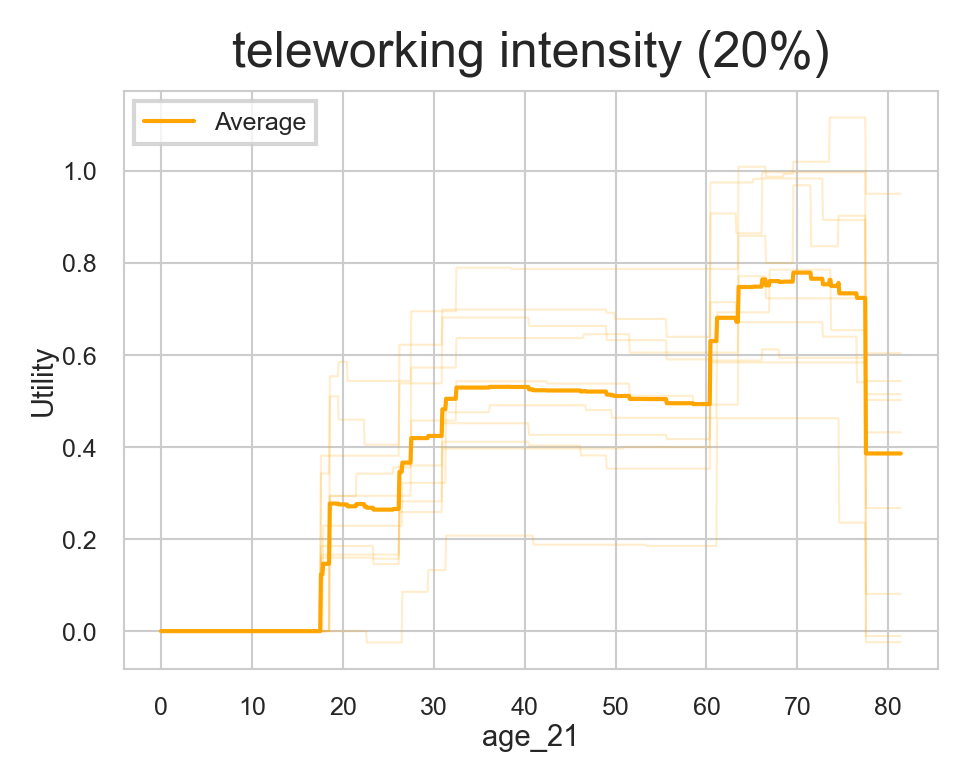

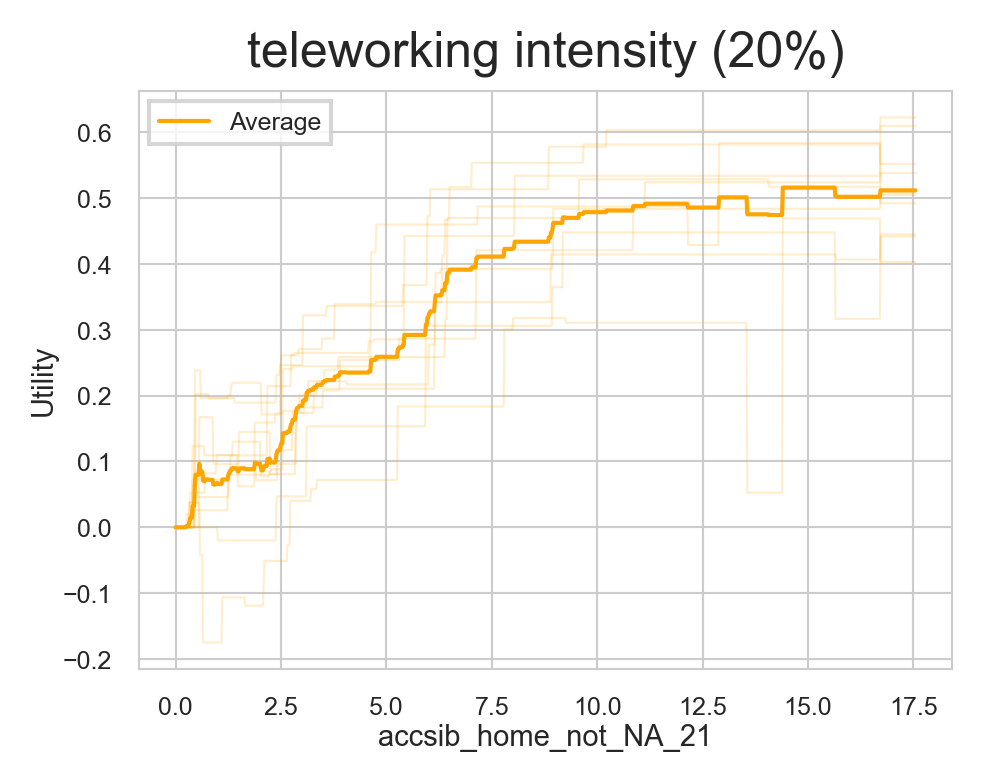

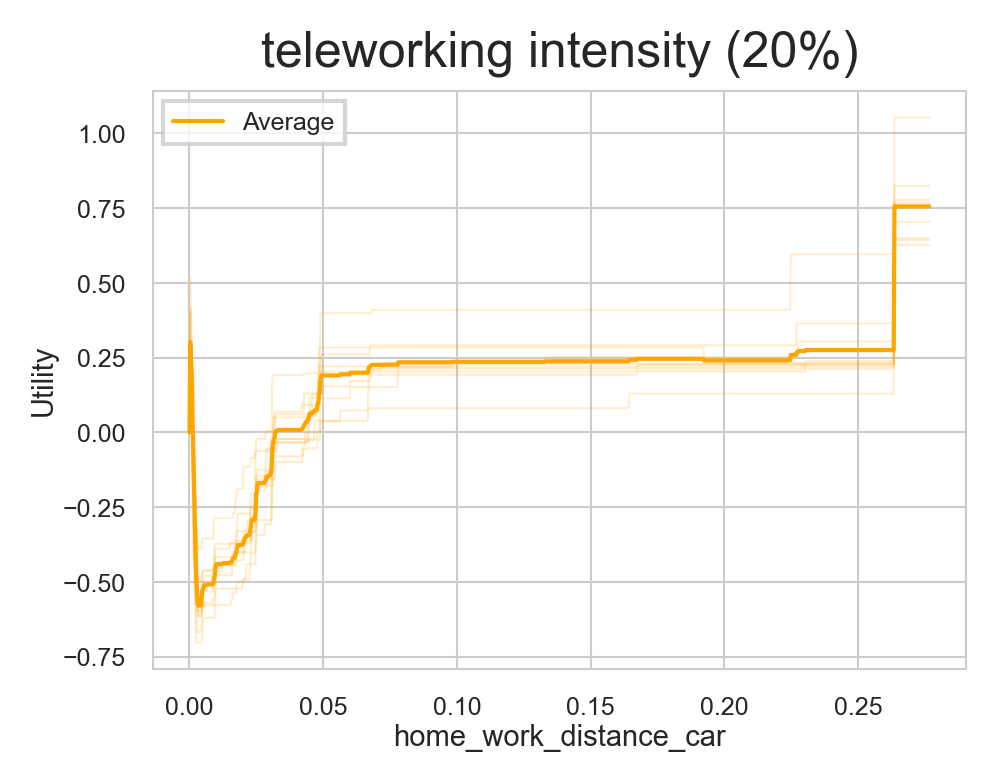

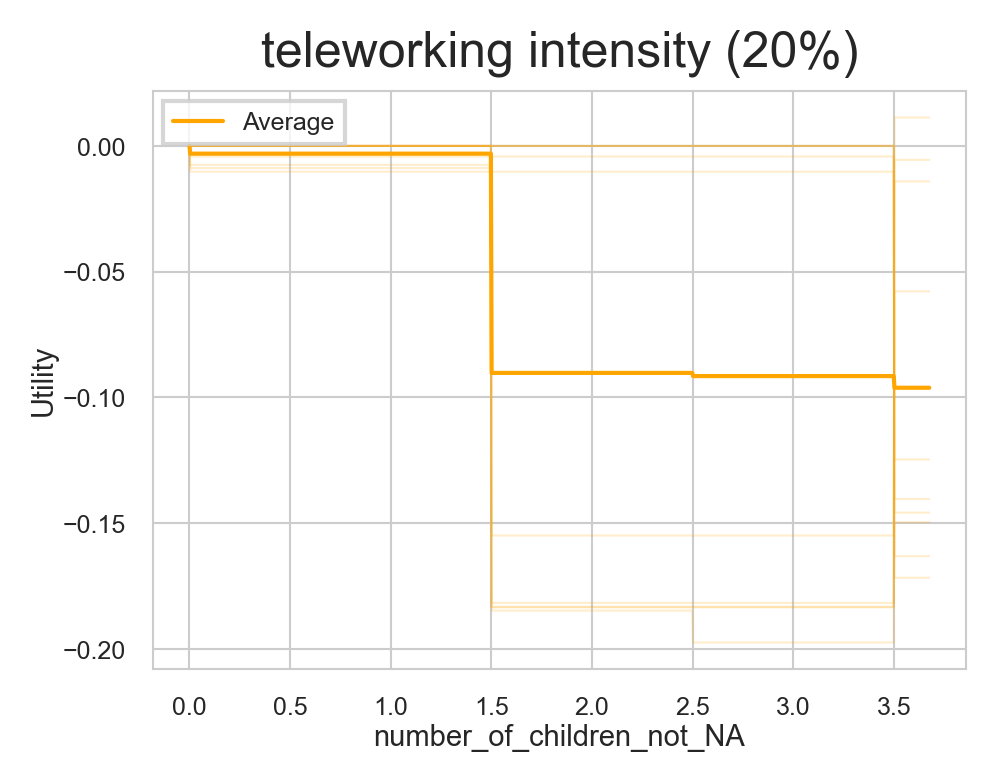

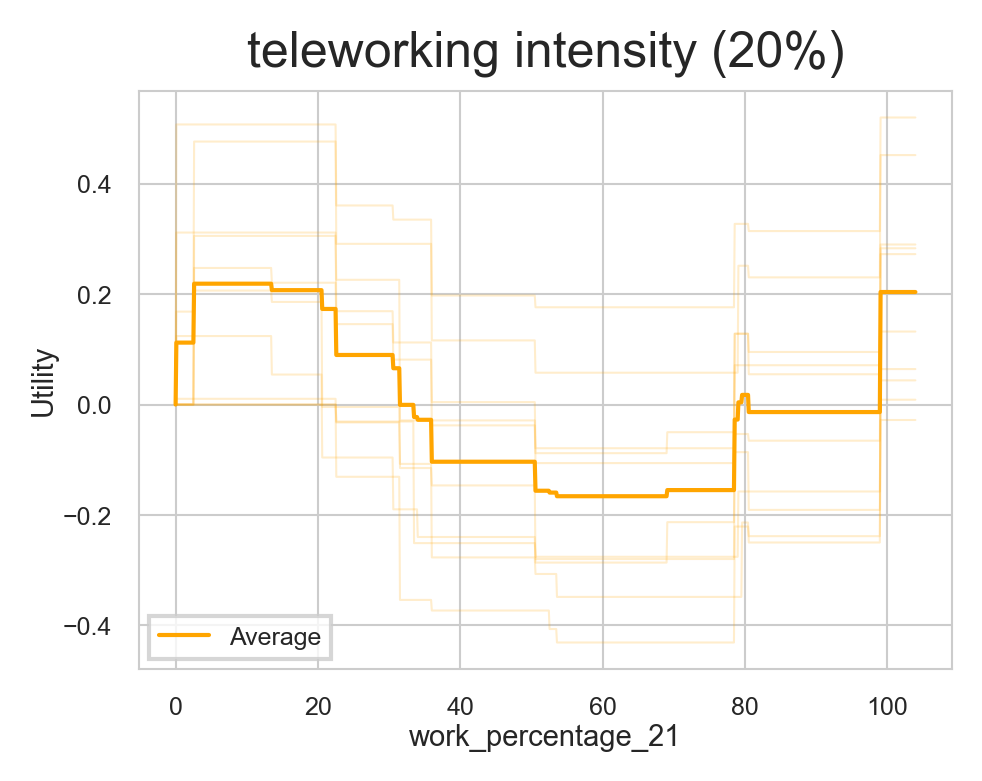

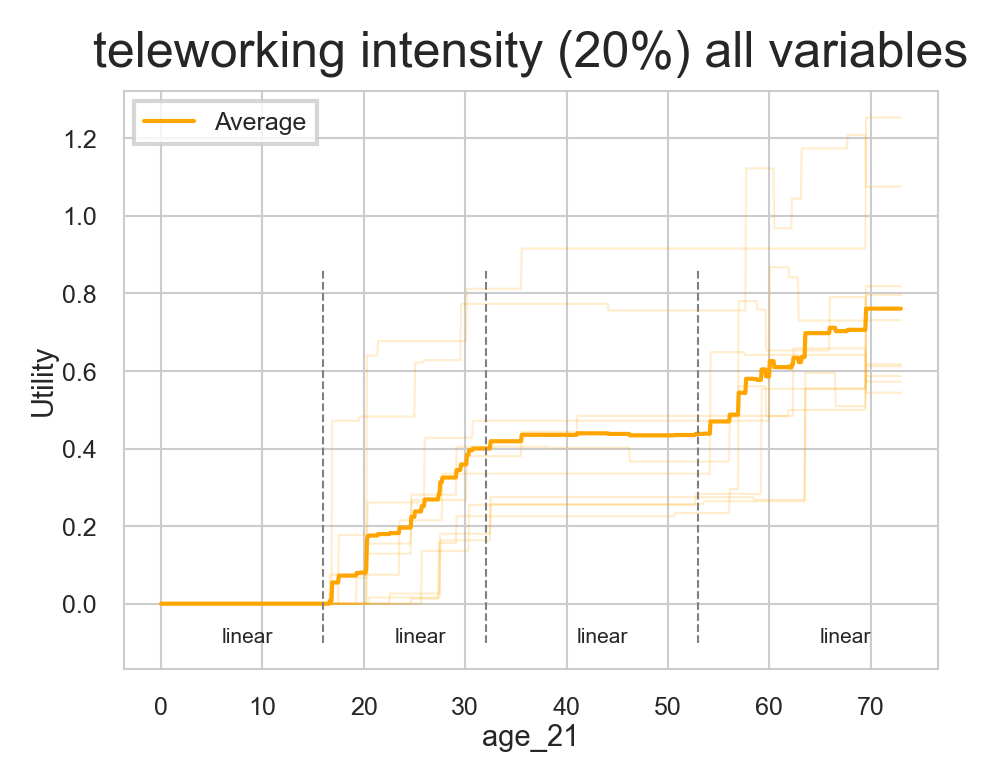

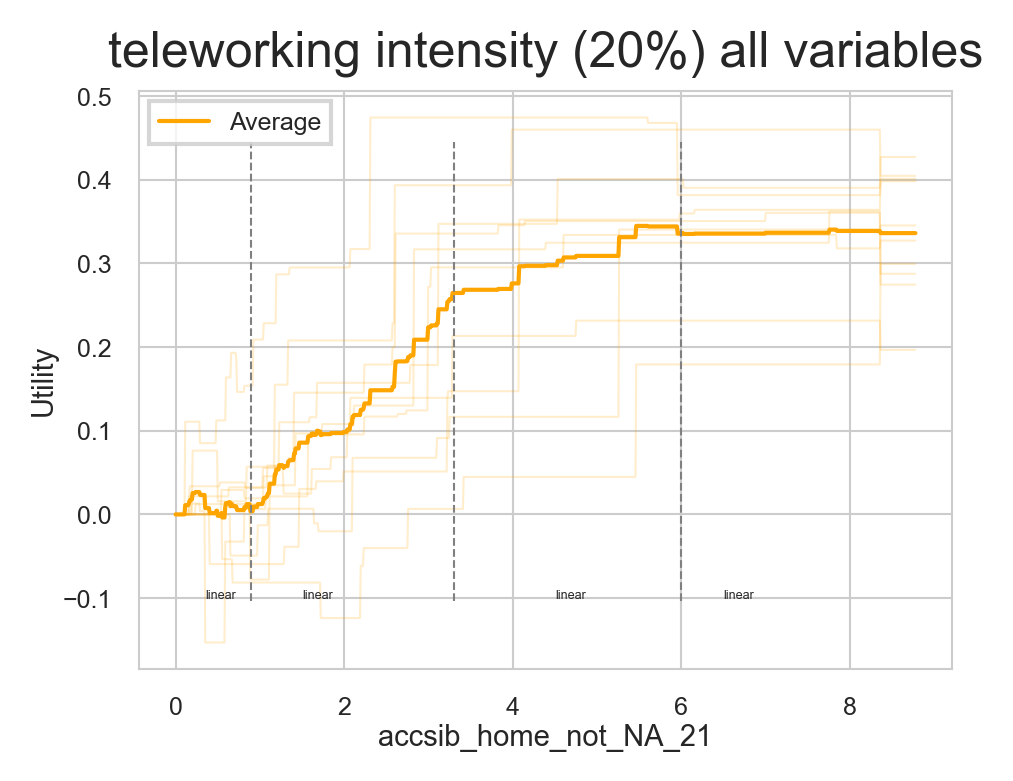

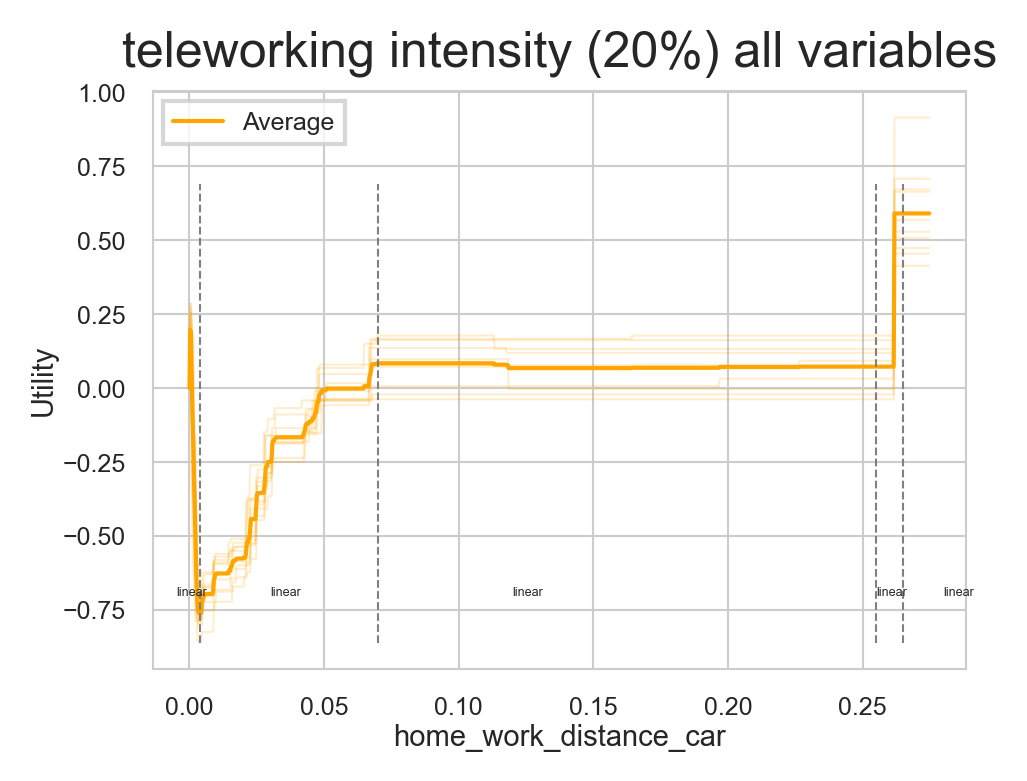

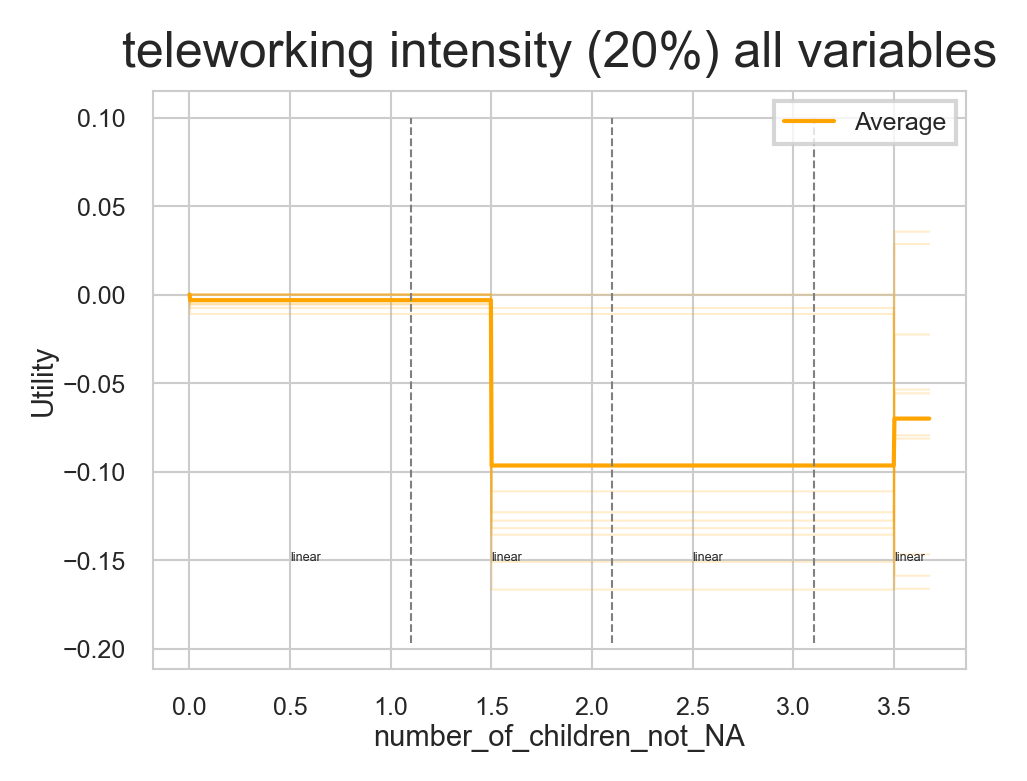

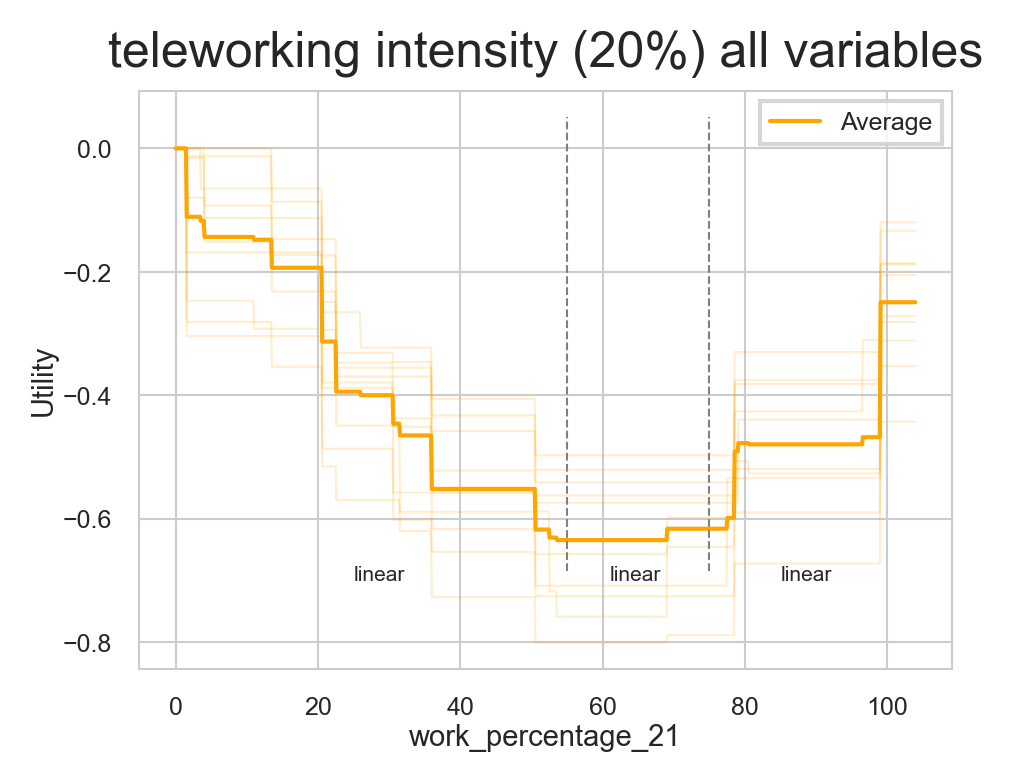

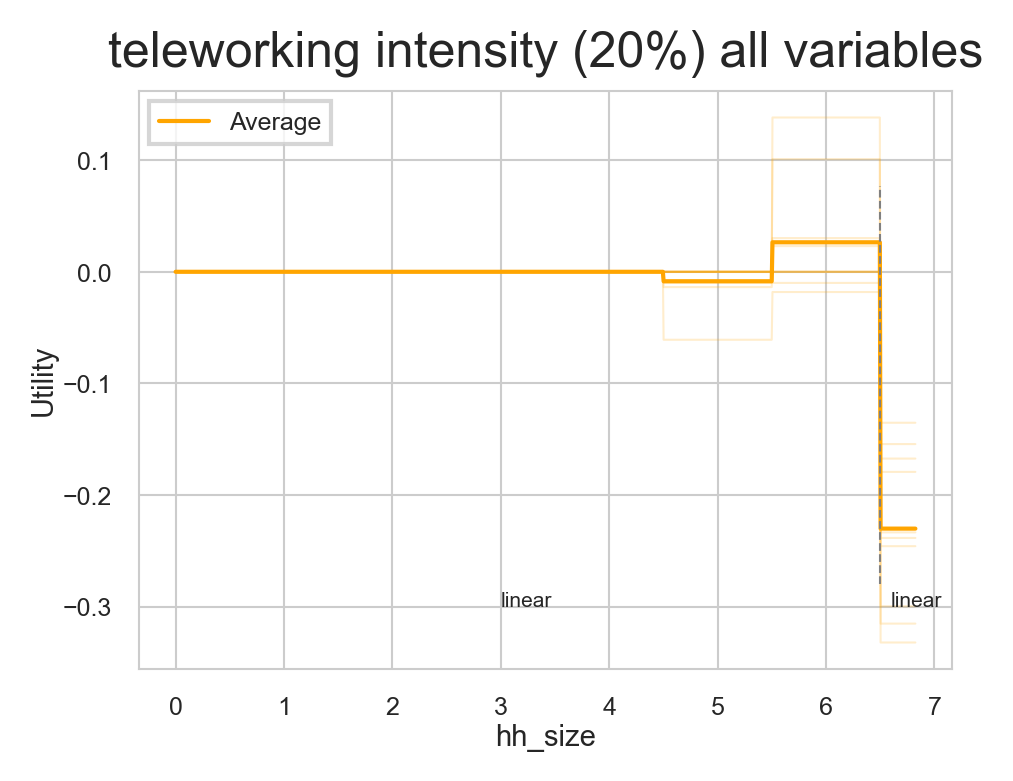

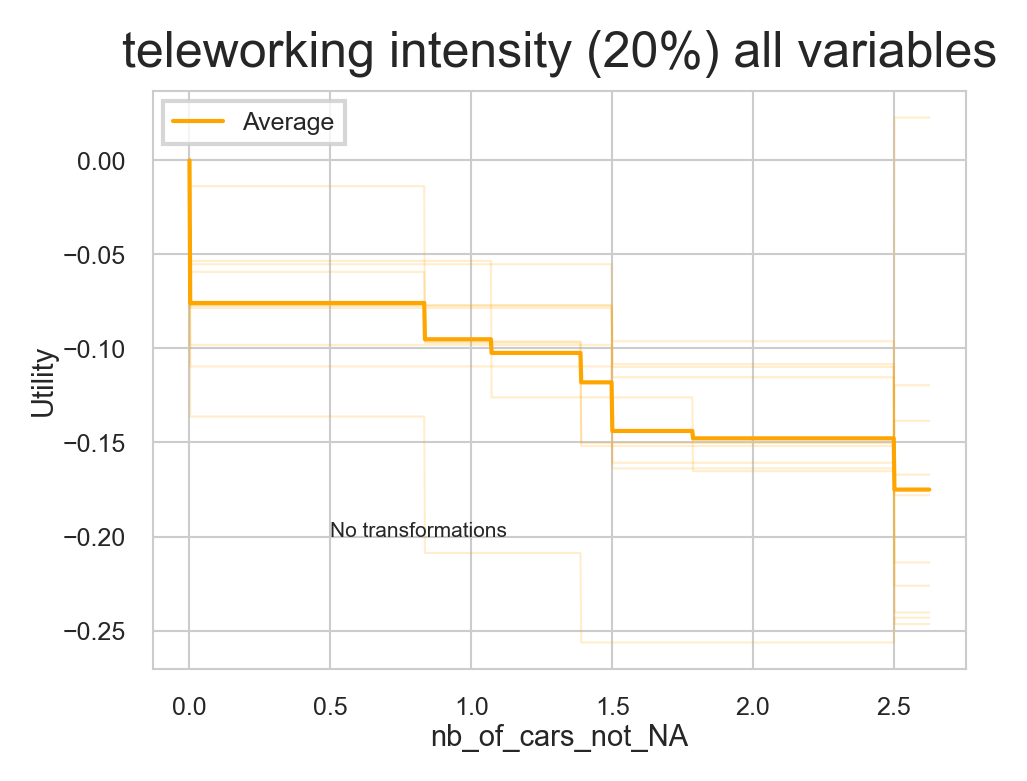

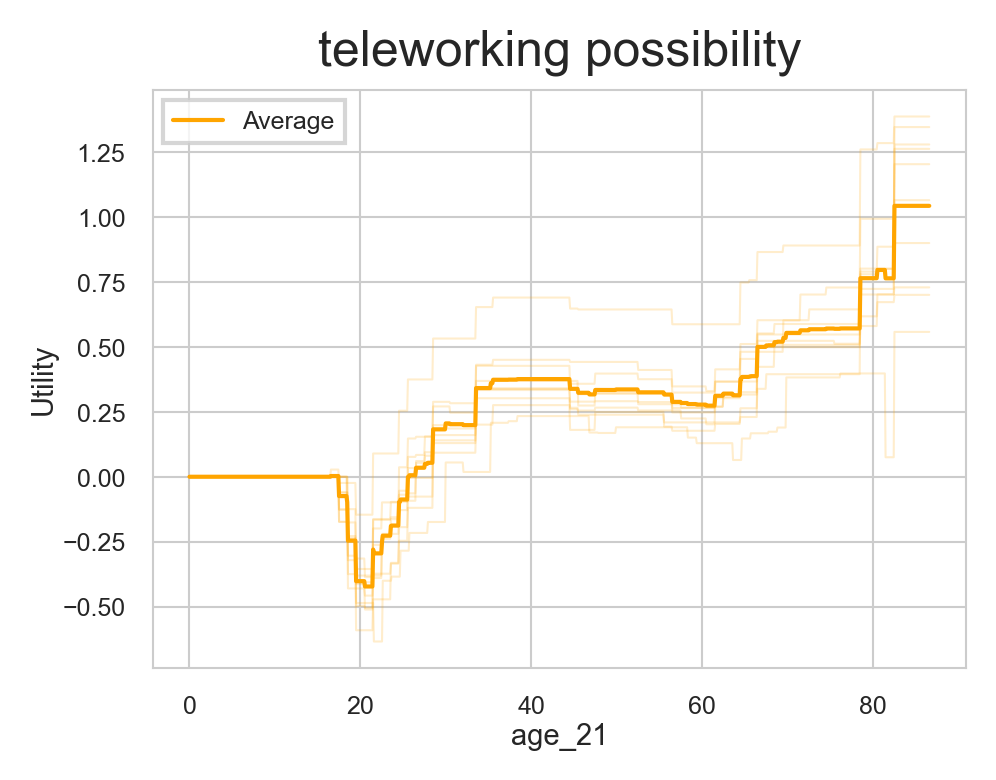

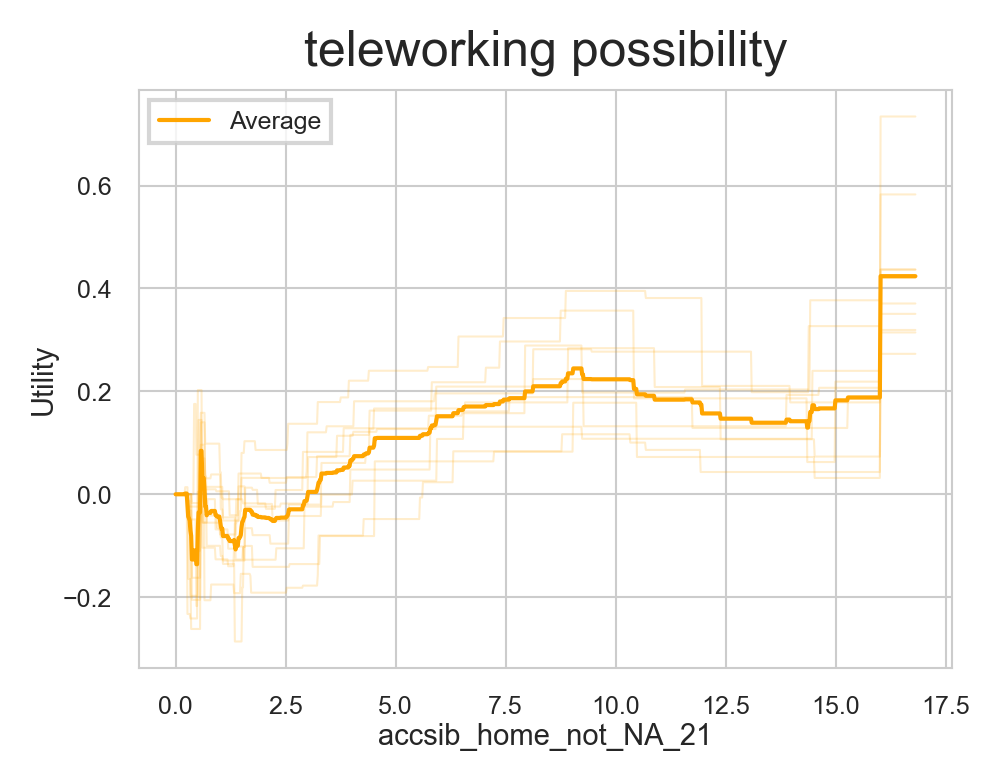

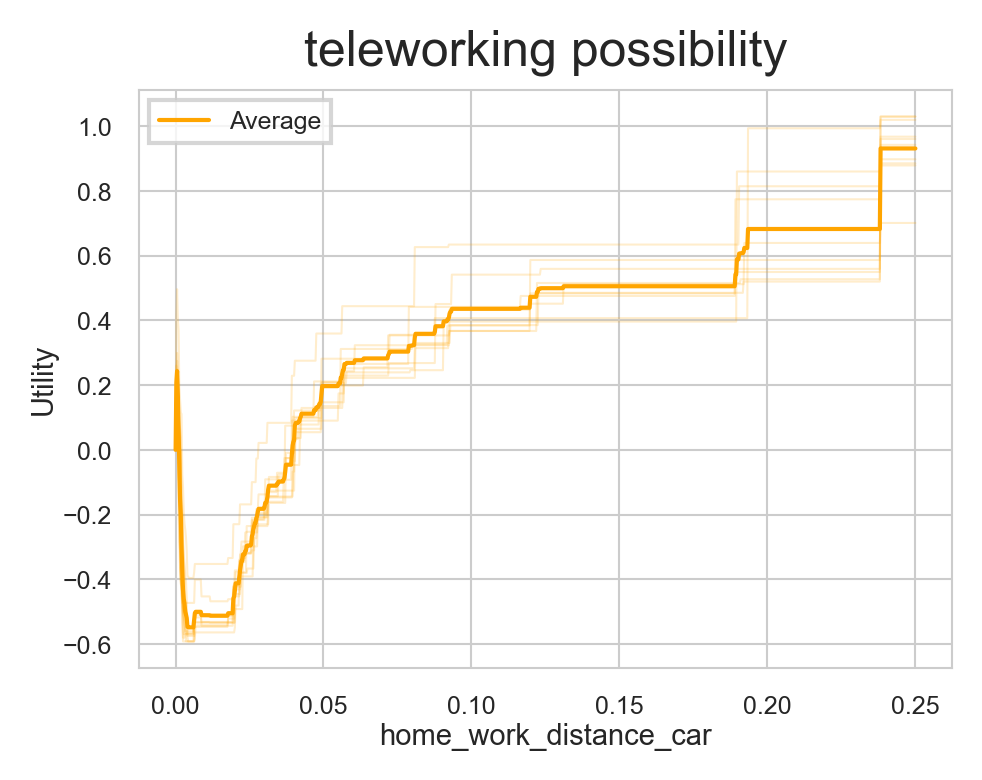

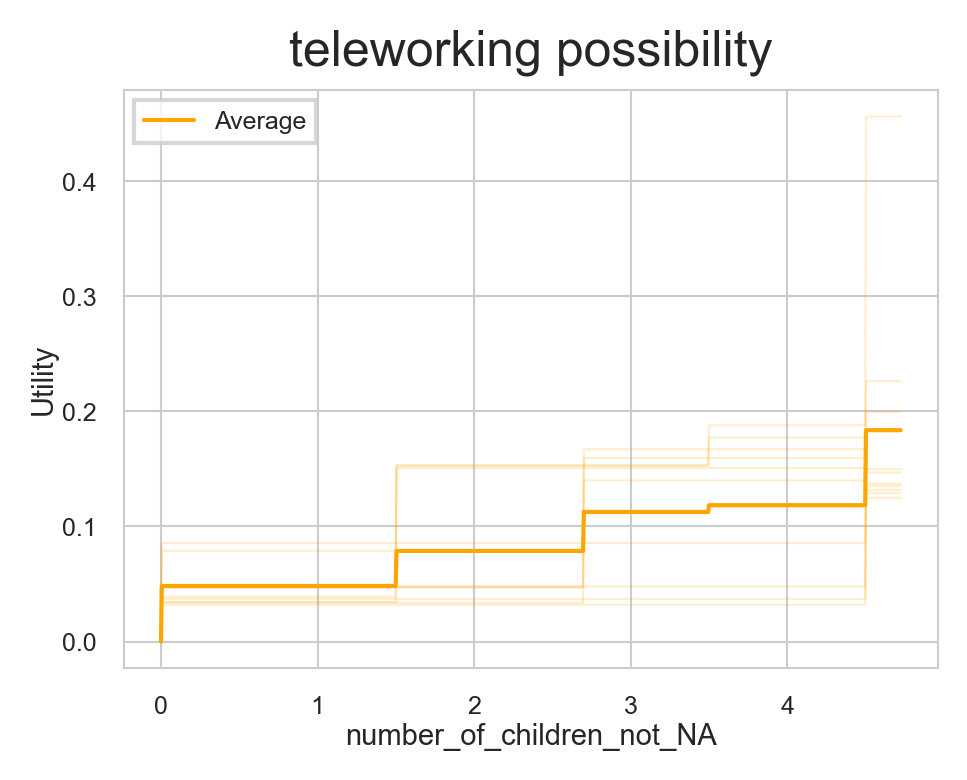

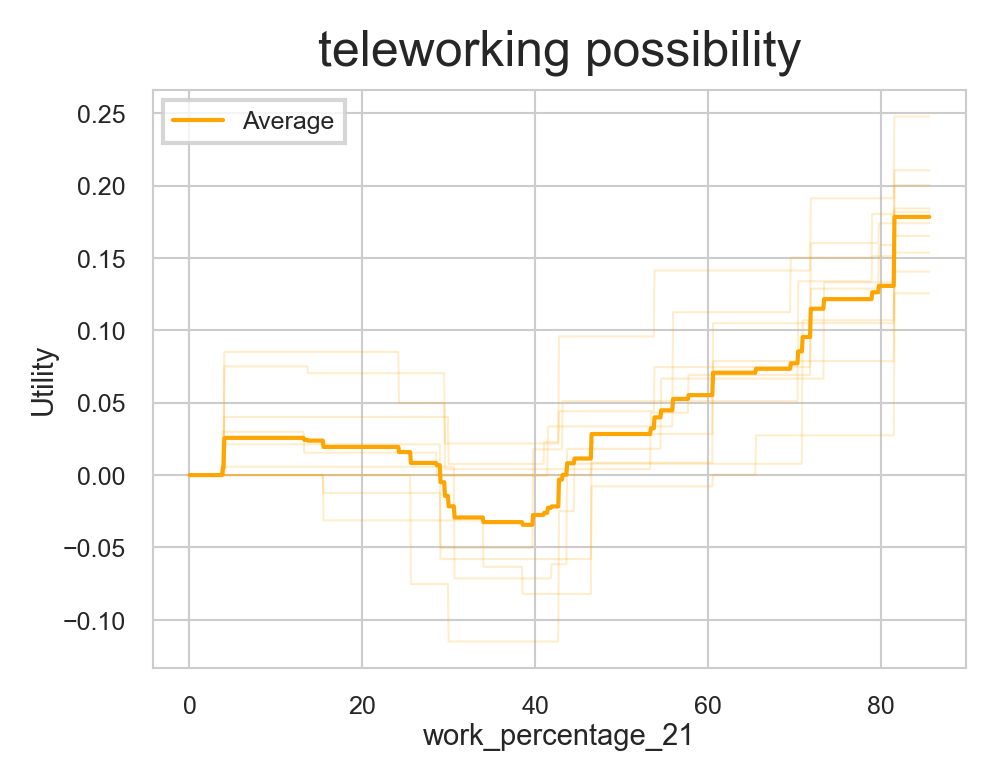

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.option_context("mode.use_inf_as_na", True)
tex_fonts = {
    # Use LaTeX to write all text
    # "text.usetex": True,
    # "font.family": "serif",
    # "font.serif": "Computer Modern Roman",
    # Use 14pt font in plots, to match 10pt font in document
    "axes.labelsize": 7,
    "axes.linewidth": 0.5,
    "axes.labelpad": 1,
    "font.size": 7,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 6,
    "legend.fancybox": False,
    "legend.edgecolor": "inherit",
    "legend.borderaxespad": 0.4,
    "legend.borderpad": 0.4,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6,
    "xtick.major.pad": 0.5,
    "ytick.major.pad": 0.5,
    "grid.linewidth": 0.5,
    "lines.linewidth": 0.8,
}
sns.set_theme(font_scale=1, rc=tex_fonts)
sns.set_style("whitegrid")
title_names = ["teleworking intensity (20%)", "teleworking intensity (20%) all variables", "teleworking possibility"]
ufs_dict = {}
for k, (j, l) in enumerate(all_weights.items()):
    for f in nonlin_params_name:
        if f not in l[0].keys():
            continue
        ufs_dict[f] = {
            "xplot": np.linspace(0, 1.05 * l[0][f]["Splitting points"][-1], 1000),
            "yarr": np.array([]),
            "yav": [],
        }
        yi = []
        for weights in l:
            _, y = non_lin_function(weights[f], 0, 1.05 * weights[f]["Splitting points"][-1], 1000)
            yi.append([yii - y[0] for yii in y])
        ufs_dict[f]["yarr"] = np.array(yi)
        ufs_dict[f]["yav"] = ufs_dict[f]["yarr"].mean(axis=0)

        x, y = ufs_dict[f]["xplot"], ufs_dict[f]["yav"]
        fig, ax = plt.subplots(figsize=(3.5, 2.5), dpi = 300)
        sns.lineplot(
            x=x, y=y, ax=ax, color="orange", linewidth=1, label="Average"
        )
        for i in range(len(l)):
            sns.lineplot(
                x=x,
                y=ufs_dict[f]["yarr"][i, :].T,
                color="orange",
                alpha=0.2,
                ax=ax,
                linewidth=0.5,
            )

        if j == "20_all_vars":
            if f =="age_21":
                plt.text(6, -0.1, "linear", fontsize=5)
                ax.vlines(x=16, ymin=ufs_dict[f]["yav"].min()-0.1, ymax=ufs_dict[f]["yav"].max()+0.1, color="gray", linestyle="--", linewidth=0.5)
                plt.text(23, -0.1, "linear", fontsize=5)
                ax.vlines(x=32, ymin=ufs_dict[f]["yav"].min()-0.1, ymax=ufs_dict[f]["yav"].max()+0.1, color="gray", linestyle="--", linewidth=0.5)
                plt.text(41, -0.1, "linear", fontsize=5)
                ax.vlines(x=53, ymin=ufs_dict[f]["yav"].min()-0.1, ymax=ufs_dict[f]["yav"].max()+0.1, color="gray", linestyle="--", linewidth=0.5)
                plt.text(65, -0.1, "linear", fontsize=5)
            elif f == "accsib_home_not_NA_21":
                plt.text(0.35, -0.1, "linear", fontsize=3)
                ax.vlines(x=0.9, ymin=ufs_dict[f]["yav"].min()-0.1, ymax=ufs_dict[f]["yav"].max()+0.1, color="gray", linestyle="--", linewidth=0.5)
                plt.text(1.5, -0.1, "linear", fontsize=3)
                ax.vlines(x=3.3, ymin=ufs_dict[f]["yav"].min()-0.1, ymax=ufs_dict[f]["yav"].max()+0.1, color="gray", linestyle="--", linewidth=0.5)
                plt.text(4.5, -0.1, "linear", fontsize=3)
                ax.vlines(x=6, ymin=ufs_dict[f]["yav"].min()-0.1, ymax=ufs_dict[f]["yav"].max()+0.1, color="gray", linestyle="--", linewidth=0.5)
                plt.text(6.5, -0.1, "linear", fontsize=3)
            elif f == "home_work_distance_car":
                plt.text(-0.005, -0.7, "linear", fontsize=3)
                ax.vlines(x=0.004, ymin=ufs_dict[f]["yav"].min()-0.1, ymax=ufs_dict[f]["yav"].max()+0.1, color="gray", linestyle="--", linewidth=0.5)
                plt.text(0.03, -0.7, "linear", fontsize=3)
                ax.vlines(x=0.07, ymin=ufs_dict[f]["yav"].min()-0.1, ymax=ufs_dict[f]["yav"].max()+0.1, color="gray", linestyle="--", linewidth=0.5)
                plt.text(0.12, -0.7, "linear", fontsize=3) 
                ax.vlines(x=0.255, ymin=ufs_dict[f]["yav"].min()-0.1, ymax=ufs_dict[f]["yav"].max()+0.1, color="gray", linestyle="--", linewidth=0.5)
                plt.text(0.255, -0.7, "linear", fontsize=3)
                ax.vlines(x=0.265, ymin=ufs_dict[f]["yav"].min()-0.1, ymax=ufs_dict[f]["yav"].max()+0.1, color="gray", linestyle="--", linewidth=0.5)
                plt.text(0.280, -0.7, "linear", fontsize=3)
            elif f == "number_of_children_not_NA":
                plt.text(0.5, -0.15, "linear", fontsize=3)
                ax.vlines(x=1.1, ymin=ufs_dict[f]["yav"].min()-0.1, ymax=ufs_dict[f]["yav"].max()+0.1, color="gray", linestyle="--", linewidth=0.5)
                plt.text(1.5, -0.15, "linear", fontsize=3)
                ax.vlines(x=2.1, ymin=ufs_dict[f]["yav"].min()-0.1, ymax=ufs_dict[f]["yav"].max()+0.1, color="gray", linestyle="--", linewidth=0.5)
                plt.text(2.5, -0.15, "linear", fontsize=3) 
                ax.vlines(x=3.1, ymin=ufs_dict[f]["yav"].min()-0.1, ymax=ufs_dict[f]["yav"].max()+0.1, color="gray", linestyle="--", linewidth=0.5)
                plt.text(3.5, -0.15, "linear", fontsize=3)
            elif f == "work_percentage_21":
                plt.text(25, -0.7, "linear", fontsize=5)
                ax.vlines(x=55, ymin=ufs_dict[f]["yav"].min()-0.05, ymax=ufs_dict[f]["yav"].max()+0.05, color="gray", linestyle="--", linewidth=0.5)
                plt.text(61, -0.7, "linear", fontsize=5)
                ax.vlines(x=75, ymin=ufs_dict[f]["yav"].min()-0.05, ymax=ufs_dict[f]["yav"].max()+0.05, color="gray", linestyle="--", linewidth=0.5)
                plt.text(85, -0.7, "linear", fontsize=5)
            elif f == "hh_size":
                plt.text(3, -0.3, "linear", fontsize=5)
                ax.vlines(x=6.5, ymin=ufs_dict[f]["yav"].min()-0.05, ymax=ufs_dict[f]["yav"].max()+0.05, color="gray", linestyle="--", linewidth=0.5)
                plt.text(6.6, -0.3, "linear", fontsize=5)
            elif f == "nb_of_cars_not_NA":
                plt.text(0.5, -0.2, "No transformations", fontsize=5)
        ax.set_title(title_names[k])
        ax.set_xlabel(f)
        ax.set_ylabel("Utility")